# Introduction & Storytelling

Capstone Project Python Notebook

Telecom Customer Churn Prediction

In a competitive telecommunication business environment we need an effective model to predict churn; as it has cost to offer potential churning customers to keep them on network. When a chun management program is operated successfully, marketing can develop right retention offers customized across differrent customer segments. If the prediction is not accurate it will add extra burden for customers who were actually going to stay. 

We have data for telecom customers usage and demographic information. Using this as input our target is to predict if customer will churn or not. We will identify significant factors which can lead to churn and organization can work on these factors in conjunction with supporting data (customer care & quality). 

Our input data is based on following major inputs:

* Revenue
* Change in revenue
* Service wise usage (voice, SMS, data)
* Quality statistics / calls to customer care
* Demographics (location)

After analyzing and putting data into different models following factors are of significant importance:

* Drop in voice usage
* Declining quality (calls status)
* Reduced peak usage
* Equipment price
* Geographical location

Technically we had cleaned the data and got rid of null values. We took visualizations into consideration for deciding features having predictive power. There is no single model which can predict everything accurately so in end we have combined models into one. In future we can merge this data with quality stats and customer care figures to have more accurate predictions. 


# Metadata & Versions: 

Author: Rizwan Khaliq

Throughout this jupyter notebook we will exlain actions in "Markdown" cells so that code can be kept as simple as possible.

Created V01 on: 2017-12-12, Loaded data and did a bit of cleaning

V01 on: 2017-12-12, Loaded data and did a bit of cleaning

V02 on: 2018-01-08, Formatted Jupyter notebook before further working

V03 on: 2018-01-29, Added Ensemble, feature selection and rearranging notebook for upload and presentation.

V04 on: 2018-02-05, Formating notebook for presentation.


# Import Libraries
Import libraries which are required for reading, cleaning, analyzing and modeling the data. Or we can say that we are inviting experts to collaborate on our project.


In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_rows',100) # Setting it so that I can see all values when looking at null values.
pd.set_option('display.max_columns',100)

# Read Data from CSV

We are reading data from source file which is a CSV and making a data frame out of it. The main data frame is called df and for testing we have created a small data frame with name dfs (only with 200 rows).


In [19]:
source_file = 'telecom_customer_churn.csv'
df = pd.read_csv(source_file)
# dfs = df[0:200]

# Some stats about data

We have 100 columns/features and 100,000 rows.

Describe tells that 79 columns are already numeric

In [20]:
# View head of data and get some stats
df.head() 
df.shape
df.describe()
df.corr()

rev_Mean  mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
rev_Mean         1.000000  0.706029     0.602148  0.403806     0.772117   
mou_Mean         0.706029  1.000000     0.575567  0.394583     0.575611   
totmrc_Mean      0.602148  0.575567     1.000000  0.306966     0.200732   
da_Mean          0.403806  0.394583     0.306966  1.000000     0.304596   
ovrmou_Mean      0.772117  0.575611     0.200732  0.304596     1.000000   
ovrrev_Mean      0.776647  0.541250     0.164401  0.274344     0.956056   
vceovr_Mean      0.772159  0.539811     0.163038  0.274162     0.953231   
datovr_Mean      0.152664  0.090349     0.035428  0.040290     0.162933   
roam_Mean        0.374718  0.125442     0.046865  0.044899     0.040371   
change_mou       0.075835 -0.008211    -0.020845 -0.021603    -0.011172   
change_rev       0.150753  0.019209    -0.022506 -0.017419    -0.004383   
drop_vce_Mean    0.422769  0.594143     0.350159  0.261855     0.342768   
drop_dat_Mean    0.056714  0.053056     0.037297  0.024061     0.043039   
blck_vce_Mean    0.221225  0.319167     0.180351  0.137263     0.182875   
blck_dat_Mean    0.018927  0.020117     0.010677  0.008470     0.017004   
unan_vce_Mean    0.436082  0.644809     0.358530  0.301002     0.364195   
unan_dat_Mean    0.055754  0.060691     0.041625  0.018681     0.048520   
plcd_vce_Mean    0.579054  0.822571     0.491097  0.404796     0.481654   
plcd_dat_Mean    0.116679  0.123815     0.088481  0.049706     0.092877   
recv_vce_Mean    0.487699  0.696093     0.413156  0.269415     0.417059   
recv_sms_Mean    0.016984  0.014220     0.023667  0.006075     0.003130   
comp_vce_Mean    0.590930  0.831139     0.505850  0.416492     0.491981   
comp_dat_Mean    0.116945  0.124766     0.090012  0.050065     0.092707   
custcare_Mean    0.165349  0.348877     0.143411  0.087267     0.123407   
ccrndmou_Mean    0.241622  0.393113     0.189002  0.146781     0.181692   
cc_mou_Mean      0.242095  0.379254     0.188184  0.150420     0.181180   
inonemin_Mean    0.401952  0.583024     0.339491  0.228134     0.340428   
threeway_Mean    0.201318  0.300116     0.152929  0.125655     0.185083   
mou_cvce_Mean    0.563558  0.862251     0.490109  0.327329     0.474378   
mou_cdat_Mean    0.107594  0.120182     0.076607  0.034534     0.089420   
mou_rvce_Mean    0.580334  0.825693     0.476990  0.282857     0.514544   
owylis_vce_Mean  0.479531  0.694616     0.409304  0.317266     0.403579   
mouowylisv_Mean  0.437057  0.651059     0.370759  0.262685     0.377784   
iwylis_vce_Mean  0.358005  0.557643     0.307758  0.182910     0.310820   
mouiwylisv_Mean  0.342165  0.550814     0.292266  0.161972     0.308268   
peak_vce_Mean    0.619022  0.767809     0.544934  0.421430     0.515293   
peak_dat_Mean    0.106805  0.104263     0.089004  0.049386     0.080429   
mou_peav_Mean    0.676474  0.811250     0.591601  0.417260     0.571764   
mou_pead_Mean    0.115203  0.107569     0.089304  0.041863     0.091450   
opk_vce_Mean     0.454571  0.762730     0.368188  0.270678     0.390568   
opk_dat_Mean     0.111015  0.126902     0.079510  0.044326     0.091711   
mou_opkv_Mean    0.433631  0.816294     0.355273  0.193461     0.380750   
mou_opkd_Mean    0.089182  0.109595     0.060054  0.026311     0.076151   
drop_blk_Mean    0.403679  0.570895     0.331320  0.249253     0.329717   
attempt_Mean     0.581761  0.824029     0.492796  0.404875     0.483668   
complete_Mean    0.593872  0.832570     0.507680  0.416361     0.494113   
callfwdv_Mean    0.017423  0.019634     0.014498  0.010155     0.007562   
callwait_Mean    0.447280  0.609760     0.352989  0.290748     0.436541   
churn           -0.010883 -0.057027    -0.068558 -0.013551     0.019720   
months          -0.010473 -0.082638    -0.054805  0.010955    -0.006444   
uniqsubs        -0.014402 -0.026426    -0.025429  0.001077    -0.000207   
actvsubs        -0.039413 -0.059964    -0.060243 -0.011602    -0.010026   
totcalls         0.402489  0.539785     0.

# Checking Null values

Lets see how many null values we have and this will also help us in deciding which features will NOT be used for modeling. 

In [21]:
df.isnull().sum().sort_values(ascending = False)
# 57 Features are without any null values

numbcars            49366
dwllsize            38308
HHstatin            37923
ownrent             33706
dwlltype            31909
lor                 30190
income              25436
adults              23019
infobase            22079
hnd_webcap          10189
prizm_social_one     7388
avg6rev              2839
avg6qty              2839
avg6mou              2839
kid16_17             1732
truck                1732
rv                   1732
ethnic               1732
forgntvl             1732
marital              1732
kid11_15             1732
kid6_10              1732
kid3_5               1732
kid0_2               1732
creditcd             1732
change_rev            891
change_mou            891
hnd_price             847
ovrrev_Mean           357
rev_Mean              357
vceovr_Mean           357
datovr_Mean           357
roam_Mean             357
da_Mean               357
ovrmou_Mean           357
mou_Mean              357
totmrc_Mean           357
area                   40
dualband    

# Checking data types

Check data types of data which can also tell us which features are numeric and can be directly used for modeling.

In [22]:
df.dtypes.sort_values()

months                int64
avg3rev               int64
avg3qty               int64
avg3mou               int64
adjqty                int64
totcalls              int64
actvsubs              int64
uniqsubs              int64
churn                 int64
Customer_ID           int64
change_rev          float64
callwait_Mean       float64
roam_Mean           float64
eqpdays             float64
datovr_Mean         float64
vceovr_Mean         float64
change_mou          float64
ovrrev_Mean         float64
totmou              float64
totrev              float64
adjrev              float64
adjmou              float64
ovrmou_Mean         float64
avgrev              float64
avgmou              float64
avgqty              float64
da_Mean             float64
totmrc_Mean         float64
forgntvl            float64
numbcars            float64
income              float64
adults              float64
lor                 float64
rv                  float64
callfwdv_Mean       float64
truck               

# Data Cleaning Suggestions

Based on analysis following are suggestions to clean data. For ease of presenting the counts and suggested actions are written within code. The objective is not to have any null values and convert everything to be presented as numerical.

According to analysis we have filled null values with mean value or most frequent value. We have considered that filling these values will not affect modeling. Where it could have a bad affect on modeling we dropped the records.

In some cases we observed that dropping null records is better as it will resolve multiple issues; e.g. totmrc_Mean field had 
357 null values and dropping these rows also resolved 9 other issues.
We have also considered that we are not updating a large proportion of data.


Instead of filling the values, we are applying a rule that if there are are more than 20% values are missing. Don't use this for modelling and drop it from data frame.

In [23]:
"""
Data cleaning suggestions (Revised)
"""
df['eqpdays'].value_counts().sort_values(ascending=False) # Fill it with mean value 391
df['models'].value_counts().sort_values(ascending=False) # Fill it with 1, most frequent value and all others are discrete values
df['phones'].value_counts().sort_values(ascending=False) # Fill it with 1, most frequent value and all others are discrete values
df['refurb_new'].value_counts().sort_values(ascending=False) # Fill it with N, most frequent value and possible values are N and R
df['dualband'].value_counts().sort_values(ascending=False) # Fill it with Y, most frequent value and possible values are Y,N,T,U
df['area'].value_counts().sort_values(ascending=False) # Fill it with 'NEW YORK CITY AREA', most frequent value. Count of null values is just 40
df['totmrc_Mean'].value_counts().sort_values(ascending=False) # Not recommended to fill
df[df['totmrc_Mean'].isnull()] # Returns 357 rows and as it lacks basic features so decided to drop it. Plus it will solve in total 9 features issues
df['hnd_price'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop these records.
df['change_mou'].value_counts().sort_values(ascending=False) 
# # Drop the rows. Change might be an important feature so better not to manipulate it. Quick eyeballing shows that other values are also null
df['change_rev'].value_counts().sort_values(ascending=False) # Same as change_mou
df['creditcd'].value_counts().sort_values(ascending=False) # Drop these rows as it will also resolve 11 features issues in total.
df['avg6mou'].value_counts().sort_values(ascending=False) # # Drop these rows as it will resolve 3 features in total, plus its not recommended to fill it average values.
df['prizm_social_one'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop these records.
df['hnd_webcap'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop these records. Count of null values is 10189
df['infobase'].value_counts().sort_values(ascending=False) # Fill it with 'M', most frequent value. Count of null values is 22079
df['adults'].value_counts().sort_values(ascending=False) # Fill it with 2, most frequent value. Count of null values is 23019 and mean is 2.5.
df['income'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop these records. Count of null values is 25346.
df['lor'].value_counts().sort_values(ascending=False) # Fill it with 6, most frequent value. Will not be used for modeling but good for analysis.
df['dwlltype'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop this column from data frame. Fill it with S, most frequent value. Will not be used for modeling but good for analysis.
df['ownrent'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop this column from data frame. Fill it with O, most frequent value. Will use in model but filling 33706 values from null.
df['HHstatin'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop this column from data frame. Fill it with C, most frequent value. Will not be used for modeling but good for analysis.
df['dwllsize'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop this column from data frame. Fill it with A, most frequent value. Will not be used for modeling but good for analysis.
df['numbcars'].value_counts().sort_values(ascending=False) # CHANGE FROM LAST. Drop this column from data frame. Fill it with 1, most frequent value. Will not be used for modeling but good for analysis as 50% values are null.

1.0    25586
2.0    21358
3.0     3690
Name: numbcars, dtype: int64

# Data cleaning actions

Actions will be taken in following code according to data cleaning analysis in above cell.

In [24]:
"""
Data cleaning actions Revised.
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0
"""
df.loc[df['eqpdays'].isnull(), 'eqpdays'] = 391
df.loc[df['models'].isnull(), 'models'] = 1
df.loc[df['phones'].isnull(), 'phones'] = 1
df.loc[df['refurb_new'].isnull(), 'refurb_new'] = 'N'
df.loc[df['dualband'].isnull(), 'dualband'] = 'Y'
df.loc[df['area'].isnull(), 'area'] = 'NEW YORK CITY AREA'
df.dropna(subset=['totmrc_Mean'],inplace=True,axis=0) #It solved 9 issues directly and changed rows count to 99643
df.dropna(subset=['hnd_price'],inplace=True,axis=0) # REVISED action

df.dropna(subset=['change_mou'],inplace=True,axis=0) #It solved 2 issues directly and changed rows count to 99109
df.dropna(subset=['creditcd'],inplace=True,axis=0) #It solved 11 issues directly and changed rows count to 97392
df.dropna(subset=['avg6mou'],inplace=True,axis=0) #It solved 3 issues directly and changed rows count to 94719
df.dropna(subset=['prizm_social_one'],inplace=True,axis=0) #REVISED action
df.dropna(subset=['hnd_webcap'],inplace=True,axis=0) #REVISED action

"""
After reaching this stage we are dropping all remaining columns as now the data set itself is 78K.
And null values are now almost 20 percent.

Dropping all following columns. Counts are of null values in the feature.

numbcars            37070
HHstatin            28293
dwllsize            28123
ownrent             24541
dwlltype            22845
lor                 21824
income              17946
adults              16078
infobase            15409
"""

df.drop('infobase',axis=1,inplace=True)
df.drop('adults',axis=1,inplace=True)
df.drop('income',axis=1,inplace=True)
df.drop('lor',axis=1,inplace=True)
df.drop('dwlltype',axis=1,inplace=True)
df.drop('ownrent',axis=1,inplace=True)
df.drop('dwllsize',axis=1,inplace=True)
df.drop('HHstatin',axis=1,inplace=True)
df.drop('numbcars',axis=1,inplace=True)


# Identifying ZERO value columns from Data

We realized that there are many features with lot of zero values. Will drop these columns from data frame.

If you analyze then you can see that most customers are using voice services so data usage is zero in majority cases. To reduce complexity we are dropping data usage featurs.

When these features of data usage were included in previous modeling exercise they didnt contribute in any significant score. So in refining we are dropping these features.

In [25]:
# Check zero values in columns
pd.DataFrame(df.isin([0]).sum().sort_values(ascending = False))

0
callfwdv_Mean     78030
recv_sms_Mean     77658
blck_dat_Mean     77362
drop_dat_Mean     76206
unan_dat_Mean     75754
forgntvl          73673
rv                71786
mou_pead_Mean     70771
peak_dat_Mean     70769
opk_dat_Mean      70249
mou_opkd_Mean     70239
comp_dat_Mean     66995
mou_cdat_Mean     66995
datovr_Mean       66652
plcd_dat_Mean     65671
truck             63463
threeway_Mean     56643
roam_Mean         53308
cc_mou_Mean       43008
ccrndmou_Mean     43008
custcare_Mean     43008
churn             40371
callwait_Mean     37763
da_Mean           37362
vceovr_Mean       36689
ovrmou_Mean       32760
ovrrev_Mean       32715
iwylis_vce_Mean   22494
mouiwylisv_Mean   22494
blck_vce_Mean     21561
drop_vce_Mean     11765
inonemin_Mean      9768
mouowylisv_Mean    9657
owylis_vce_Mean    9656
mou_rvce_Mean      9464
drop_blk_Mean      9004
recv_vce_Mean      8797
change_rev         8221
unan_vce_Mean      7900
opk_vce_Mean       7240
mou_opkv_Mean      7235
mou_peav_Mean      6824
peak_vce_Mean      6823
mou_cvce_Mean      6667
comp_vce_Mean      6666
complete_Mean      6657
plcd_vce_Mean      6486
attempt_Mean       6482
avg3qty            1235
change_mou         1195
avg3mou            1179
mou_Mean           1024
avg6qty             482
avg6mou             450
totmrc_Mean          95
actvsubs             62
eqpdays              25
adjqty               22
avgmou               22
avgqty               22
adjmou               22
totmou               13
totcalls             13
rev_Mean              2
months                0
hnd_price             0
creditcd              0
kid16_17              0
kid11_15              0
kid6_10               0
kid3_5                0
kid0_2                0
ethnic                0
marital               0
hnd_webcap            0
models                0
phones                0
refurb_new            0
uniqsubs              0
dualband              0
area                  0
prizm_social_one      0
avg6rev               0
avg3rev               0
avgrev                0
adjrev                0
totrev                0
asl_flag              0
crclscod              0
new_cell              0
Customer_ID           0

In [26]:
to_drop_zero_columns = ['callfwdv_Mean','recv_sms_Mean','blck_dat_Mean','drop_dat_Mean','unan_dat_Mean','forgntvl','rv',
'peak_dat_Mean','mou_pead_Mean','opk_dat_Mean','mou_opkd_Mean','datovr_Mean','comp_dat_Mean','mou_cdat_Mean','plcd_dat_Mean',
'truck','threeway_Mean'] # These columns are having most values as zero so drop them, most of them are data usage.
df.drop(to_drop_zero_columns,axis=1,inplace=True)

In [27]:
df.isnull().sum().sort_values(ascending = False) # All values for null count is zero
# df.shape # (78367, 91)

Customer_ID         0
cc_mou_Mean         0
mou_cvce_Mean       0
mou_rvce_Mean       0
owylis_vce_Mean     0
mouowylisv_Mean     0
iwylis_vce_Mean     0
mouiwylisv_Mean     0
peak_vce_Mean       0
mou_peav_Mean       0
opk_vce_Mean        0
mou_opkv_Mean       0
drop_blk_Mean       0
attempt_Mean        0
complete_Mean       0
callwait_Mean       0
churn               0
inonemin_Mean       0
ccrndmou_Mean       0
eqpdays             0
custcare_Mean       0
mou_Mean            0
totmrc_Mean         0
da_Mean             0
ovrmou_Mean         0
ovrrev_Mean         0
vceovr_Mean         0
roam_Mean           0
change_mou          0
change_rev          0
drop_vce_Mean       0
blck_vce_Mean       0
unan_vce_Mean       0
plcd_vce_Mean       0
recv_vce_Mean       0
comp_vce_Mean       0
months              0
uniqsubs            0
actvsubs            0
new_cell            0
area                0
dualband            0
refurb_new          0
hnd_price           0
phones              0
models    

# Saving cleaned data to CSV file

To avoid any disaster and as a backup plan save cleaned data frame to a file called telco_df_1.csv. We will not have to do cleaning actions if we mess our data frame.


In [28]:
# df.to_csv("telco_df_1.csv") # Old cleaning suggestions and actions file.
df.to_csv("telco_df_2.csv") # Revised cleaning suggestions and actions file.

# Target distribution

See distribution of target variable and seems that it is equally distributed. Also we have noticed the similar distribution in different subsets of data e.g. first 100 customers or first 1000 customers.

In [30]:
# Checking counts of target variable
df.churn.value_counts()

0    40371
1    37996
Name: churn, dtype: int64

# Smaller data set with focus on AVG only

Making a smaller data frame with thought that values which are close to mean might help. Purpose of small data set is to reduce computing time and we can always take full data frame as input.


In [31]:
df_temp = df[((df.rev_Mean >= 45) & (df.rev_Mean <= 50))]
df_temp.churn.value_counts()

0    2485
1    2315
Name: churn, dtype: int64

In [33]:
# df_temp.to_csv("telco_df_3.csv") # Revised cleaning suggestions and AVG file.
df_temp.to_csv("telco_df_4.csv") # Revised cleaning suggestions and AVG file and ZERO columns dropped.

In [34]:
print df.shape, df_temp.shape

(78367, 74) (4800, 74)


In [36]:
# Changing data frame to a smaller one
# df = df_temp

In [37]:
# This cell was used for comparing the beahviour of churn 0 and 1 value (with another notebook)
# Taking only churn 0 to compare with churn value 1 in other notebook
# df = df_temp [df_temp.churn == 0]

In [38]:
df.shape

(4800, 74)

In [39]:
df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
60    45.7500    150.75      30.0000      0.0          0.0          0.0   
94    49.9900    820.50      59.9900      0.0          1.5          0.0   
104   45.8475     69.50      50.4775      0.0          0.0          0.0   
240   47.5000    255.50      50.0000      0.0          0.0          0.0   
307   47.5000    429.50      50.0000      0.0          0.0          0.0   

     vceovr_Mean  roam_Mean  change_mou  change_rev  drop_vce_Mean  \
60           0.0     15.455      -40.75      1.4800       6.333333   
94           0.0      0.000       26.50      0.0000       1.666667   
104          0.0      0.390      -13.50     16.4325       0.666667   
240          0.0      0.000     -182.50      0.0000       3.666667   
307          0.0      0.000      -30.50     -7.5000       0.000000   

     blck_vce_Mean  unan_vce_Mean  plcd_vce_Mean  recv_vce_Mean  \
60             4.0      14.333333      58.666667      19.666667   
94            11.0      33.333333     158.333333      34.666667   
104            0.0       7.333333      43.666667       2.666667   
240            1.0      20.333333     162.666667      16.666667   
307            2.0      17.000000     128.333333      64.333333   

     comp_vce_Mean  custcare_Mean  ccrndmou_Mean  cc_mou_Mean  inonemin_Mean  \
60       35.333333       0.000000       0.000000     0.000000      11.000000   
94      113.333333       6.666667       6.666667     4.303333      11.666667   
104      36.000000       0.000000       0.000000     0.000000       1.666667   
240     137.666667       0.000000       0.000000     0.000000      11.666667   
307     109.333333       0.000000       0.000000     0.000000      21.000000   

     mou_cvce_Mean  mou_rvce_Mean  owylis_vce_Mean  mouowylisv_Mean  \
60       27.890000      17.540000         1.000000         0.750000   
94      483.253333     138.983333        17.666667        15.743333   
104      51.173333       1.143333        11.333333         4.960000   
240     203.393333      11.526667        23.666667        20.696667   
307     192.970000     130.533333        13.666667         6.890000   

     iwylis_vce_Mean  mouiwylisv_Mean  peak_vce_Mean  mou_peav_Mean  \
60          0.000000         0.000000      35.333333      29.956667   
94          1.666667         4.533333     100.333333     408.096667   
104         0.666667         0.650000      26.000000      35.420000   
240         5.666667         4.686667     100.666667     156.970000   
307         0.000000         0.000000     150.666667     241.820000   

     opk_vce_Mean  mou_opkv_Mean  drop_blk_Mean  attempt_Mean  complete_Mean  \
60      18.333333      15.473333      10.333333     58.666667      35.333333   
94      46.666667     214.140000      12.666667    158.333333     113.333333   
104     11.333333      16.900000       0.666667     43.666667      36.000000   
240     50.666667      57.950000       4.666667    162.666667     137.666667   
307     23.000000      81.683333       2.000000    128.333333     109.333333   

     callwait_Mean  churn  months  uniqsubs  actvsubs new_cell crclscod  \
60        0.000000      1      50         1         1        N        A   
94        4.000000      0      56         1         1        N        A   
104       0.000000      0      52         2         2        Y        A   
240       0.666667      1      55         4         4        Y        A   
307       1.000000      1      54         1         1        Y        A   

    asl_flag  totcalls    totmou   totrev   adjrev    adjmou  adjqty  avgrev  \
60         N      3709   5037.00  1719.71  1708.42   4989.00    3674   42.71   
94         N     12808  43342.00  4414.70  4331.10  43025.00   12704   78.75   
104        N      1663   3441.00  1803.27  1761.18   3301.00    1611   35.22   
240        N     16473  30430.06  3280.96  3189.29  30085.06   16232   60.18   
307        N     12681  36184.88  3524.42  3445.52  35937.88   

# Heat Map to see correlation

We are plotting heat map of correlation matrix to see if there is a significant relationship which we can use for modeling. We have dropped customer ID from heat map as its not of any use in correlation.

Also dropped target variable churn from correlation matrix.

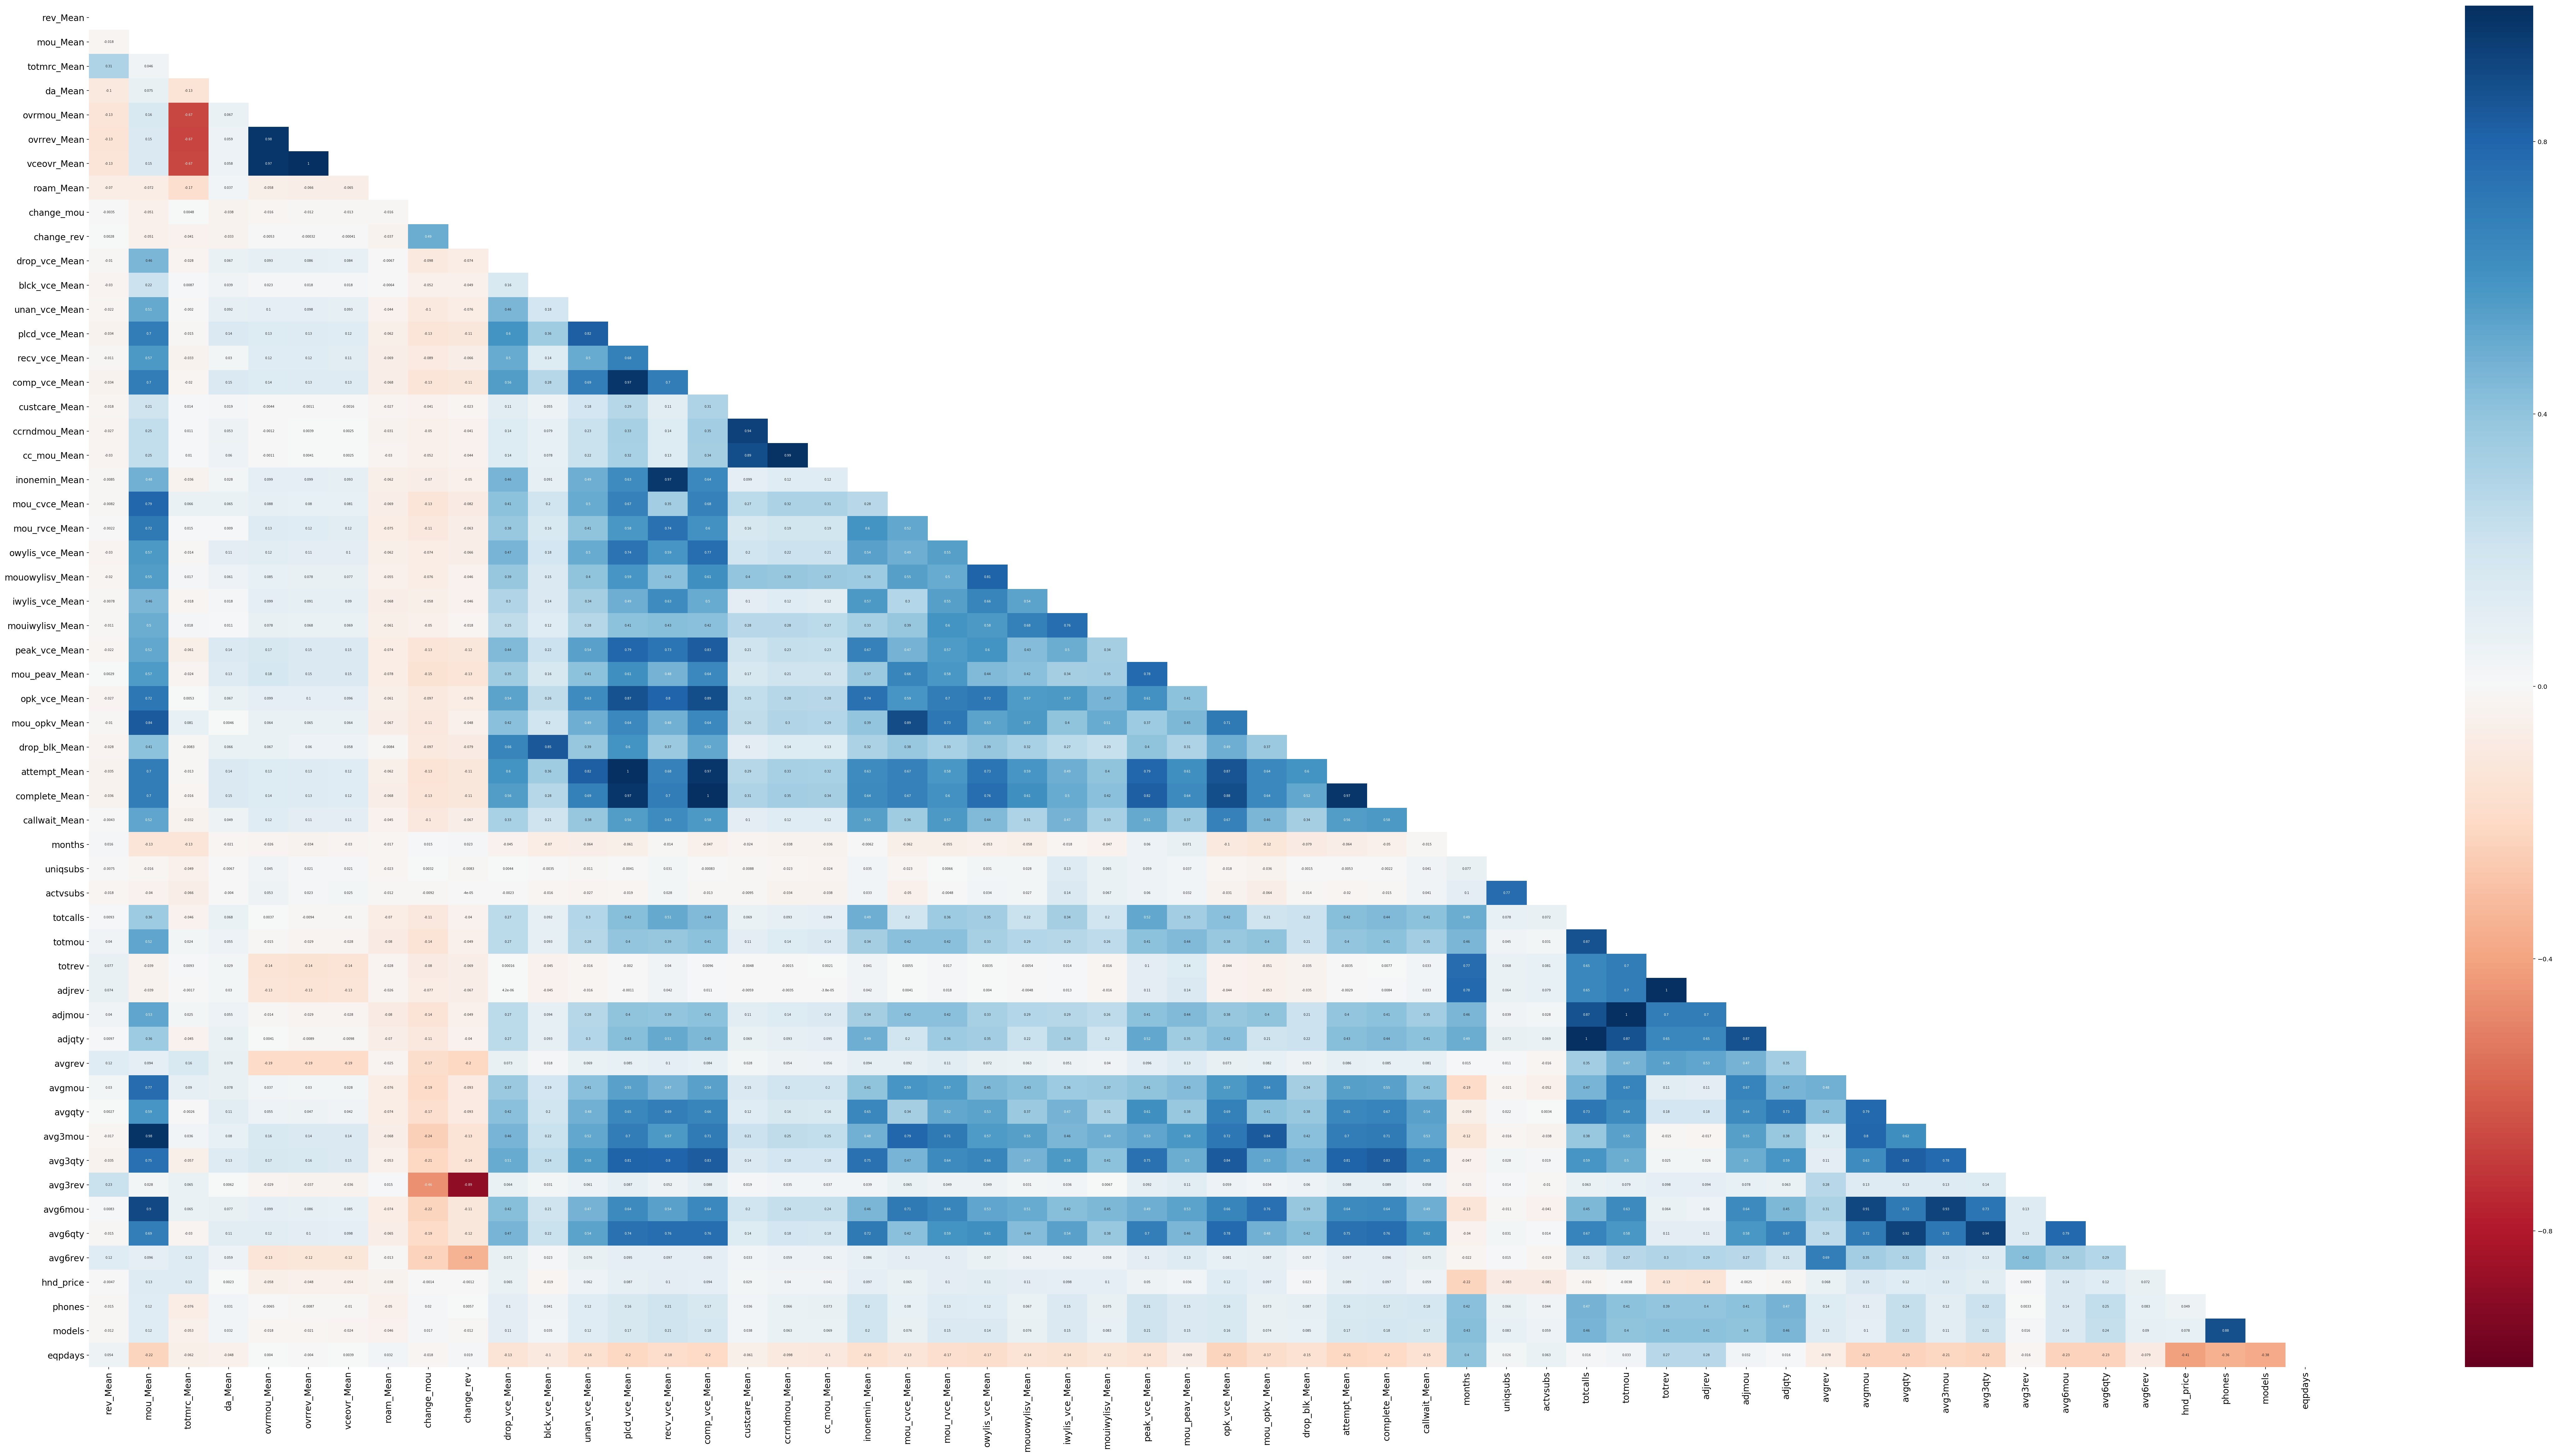

In [40]:
"""
Heat map code from Valarie
Very basic visual analysis to see what is not relevant
"""
corr_heat = df.drop(['Customer_ID','churn'],axis=1).corr() # Dropping Customer ID as it is not needed. Dropping churn on Lloyd discussion
fix, ax = plt.subplots(figsize=(80,40)) #Original size was 20,14
mask = np.zeros_like(corr_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_heat, mask=mask, ax=ax, annot=True, annot_kws={"size": 5}, cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

In [41]:
"""
Sorted correlation with churn variable only
"""
df.corr()['churn'].sort_values() #No significant value found for correlation for binary variable churn.

hnd_price         -0.085080
mou_Mean          -0.072659
mou_cvce_Mean     -0.061175
avg3mou           -0.059363
change_mou        -0.059269
iwylis_vce_Mean   -0.057146
mou_opkv_Mean     -0.055329
avg6mou           -0.051683
totmrc_Mean       -0.050150
comp_vce_Mean     -0.050074
complete_Mean     -0.049842
opk_vce_Mean      -0.049287
avg3qty           -0.046541
models            -0.046533
mou_peav_Mean     -0.044491
plcd_vce_Mean     -0.044047
attempt_Mean      -0.043791
da_Mean           -0.040429
phones            -0.039679
avg6qty           -0.039546
peak_vce_Mean     -0.038981
mouiwylisv_Mean   -0.036674
mou_rvce_Mean     -0.036514
owylis_vce_Mean   -0.034415
recv_vce_Mean     -0.032571
Customer_ID       -0.031182
inonemin_Mean     -0.027913
unan_vce_Mean     -0.025472
callwait_Mean     -0.025070
change_rev        -0.020266
avgmou            -0.020233
mouowylisv_Mean   -0.019335
avgqty            -0.013682
drop_vce_Mean     -0.007265
avg6rev           -0.005561
cc_mou_Mean       -0

# Data types check (again) 

We are checking data types again to drop non numeric features from initial modeling. It will also identify non numeric features for making dummies.


In [43]:
df.dtypes.sort_values()

uniqsubs              int64
avg3rev               int64
avg3qty               int64
avg3mou               int64
adjqty                int64
totcalls              int64
actvsubs              int64
months                int64
churn                 int64
Customer_ID           int64
drop_vce_Mean       float64
eqpdays             float64
vceovr_Mean         float64
change_rev          float64
totmou              float64
totrev              float64
adjrev              float64
adjmou              float64
ovrmou_Mean         float64
avgrev              float64
roam_Mean           float64
avgmou              float64
da_Mean             float64
totmrc_Mean         float64
mou_Mean            float64
avg6mou             float64
avg6qty             float64
avg6rev             float64
hnd_price           float64
phones              float64
models              float64
avgqty              float64
change_mou          float64
ovrrev_Mean         float64
complete_Mean       float64
blck_vce_Mean       

# Distribution plots

Lets look at histograms to see distribution of data.

For ease we have taken out the string features/columns or non-numeric variables, and placed them in an array so that whenever we want to eliminate them we can.

The distribution plots also help in identifying what can be significant feature for modeling if it has a verity of values.


In [44]:
# Identifying string features/columns so that we can eliminate them with code reusability for distribution plots.
string_features = ['Customer_ID','dualband','creditcd','kid16_17','kid11_15','kid6_10','kid3_5','kid0_2','ethnic','marital','prizm_social_one','crclscod','hnd_webcap','new_cell','area','refurb_new','asl_flag']
string_features_and_output = ['Customer_ID','dualband','creditcd','kid16_17','kid11_15','kid6_10','kid3_5','kid0_2','ethnic','marital','prizm_social_one','crclscod','hnd_webcap','new_cell','area','refurb_new','asl_flag','churn']
string_features_wo_cust_id = ['dualband','creditcd','kid16_17','kid11_15','kid6_10','kid3_5','kid0_2','ethnic','marital','prizm_social_one','crclscod','hnd_webcap','new_cell','area','refurb_new','asl_flag']
string_features_wo_cust_id_and_output = ['dualband','creditcd','kid16_17','kid11_15','kid6_10','kid3_5','kid0_2','ethnic','marital','prizm_social_one','crclscod','hnd_webcap','new_cell','area','refurb_new','asl_flag','churn']

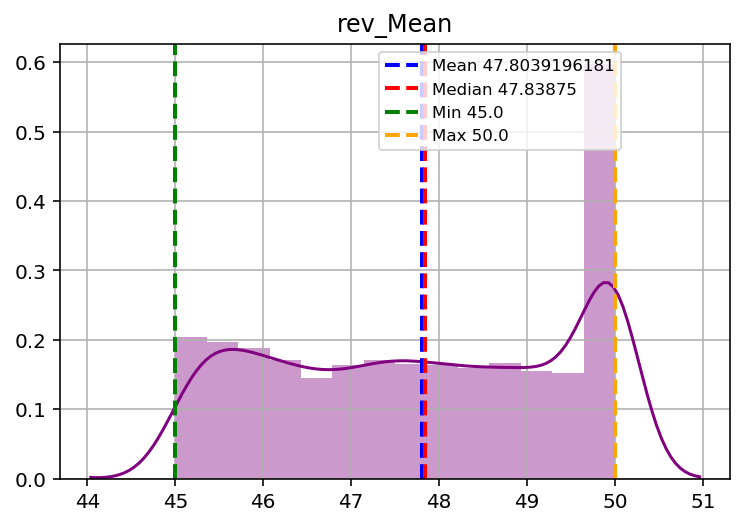

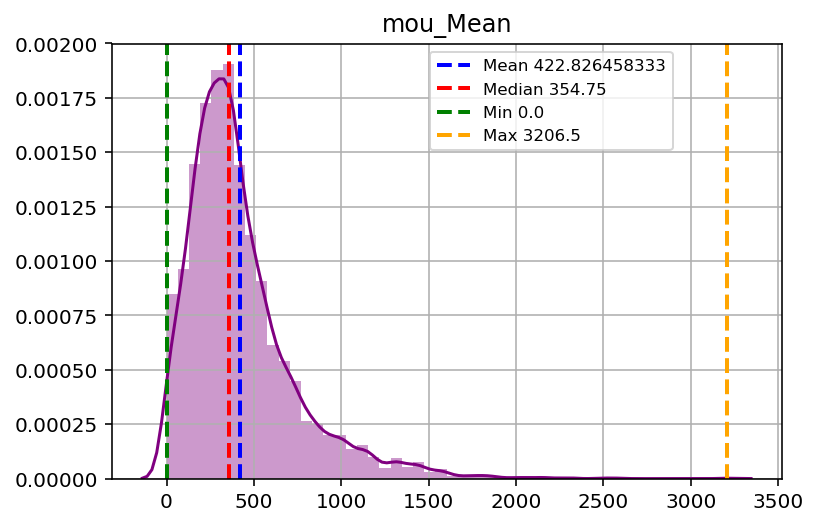

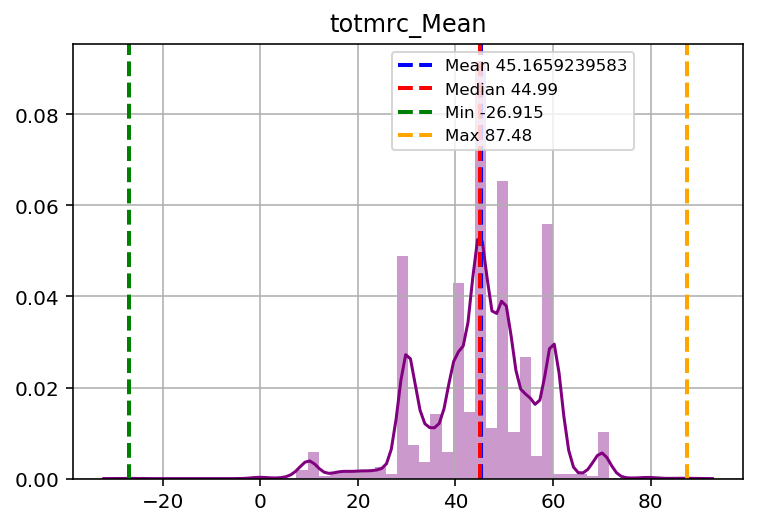

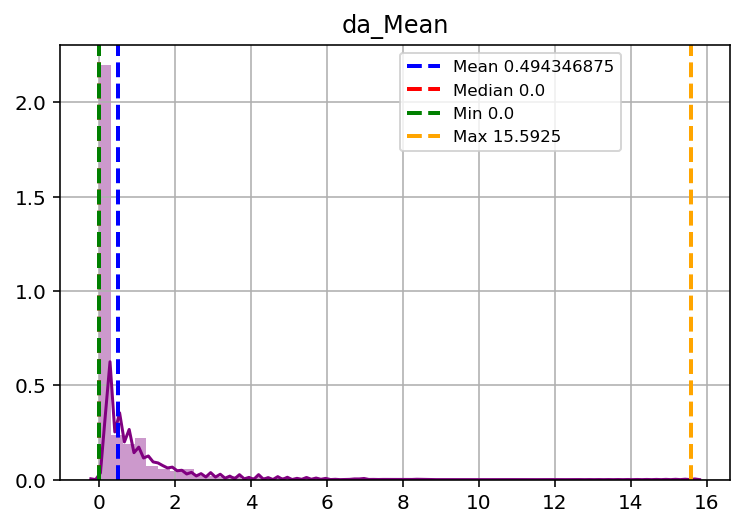

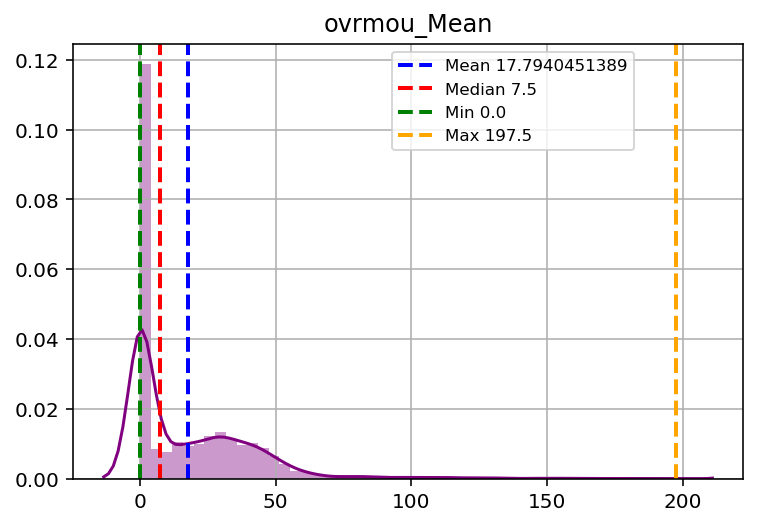

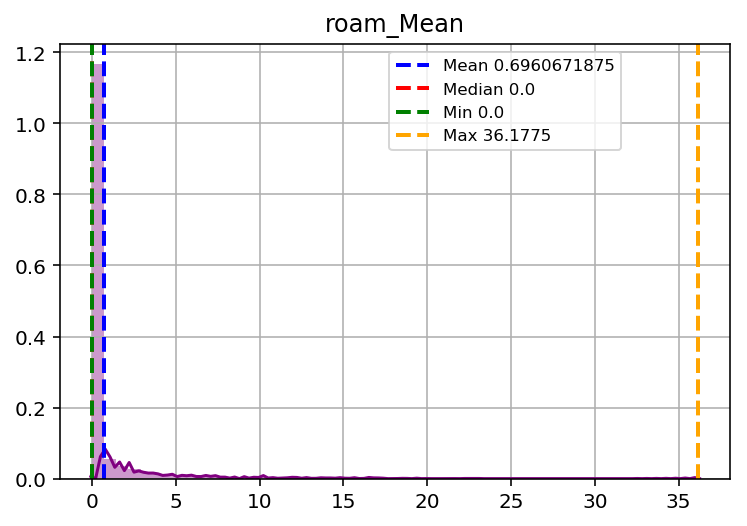

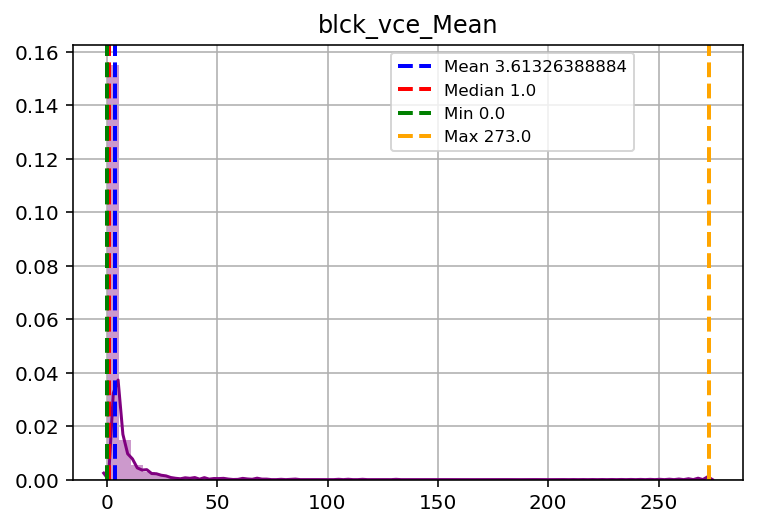

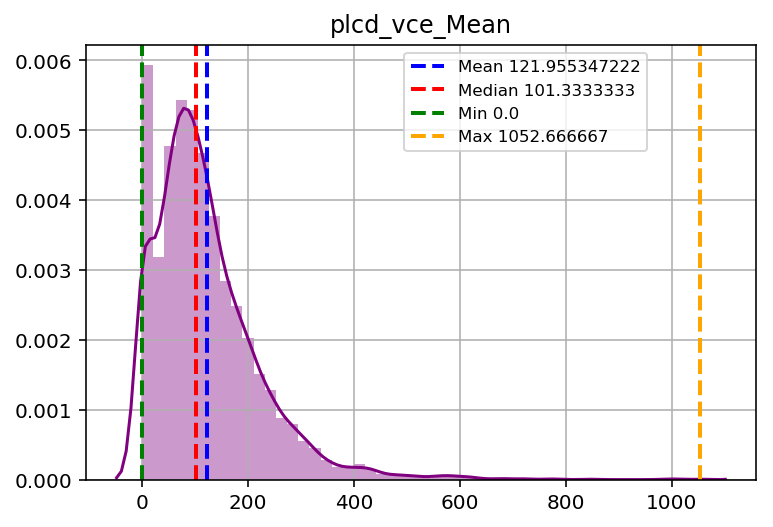

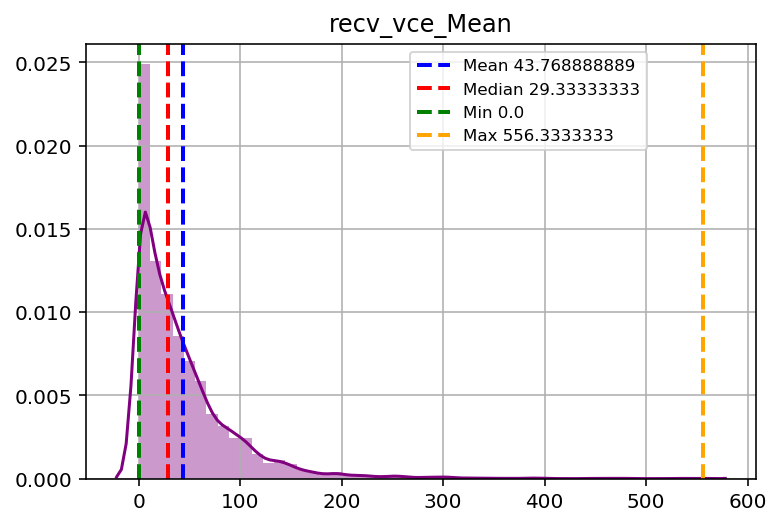

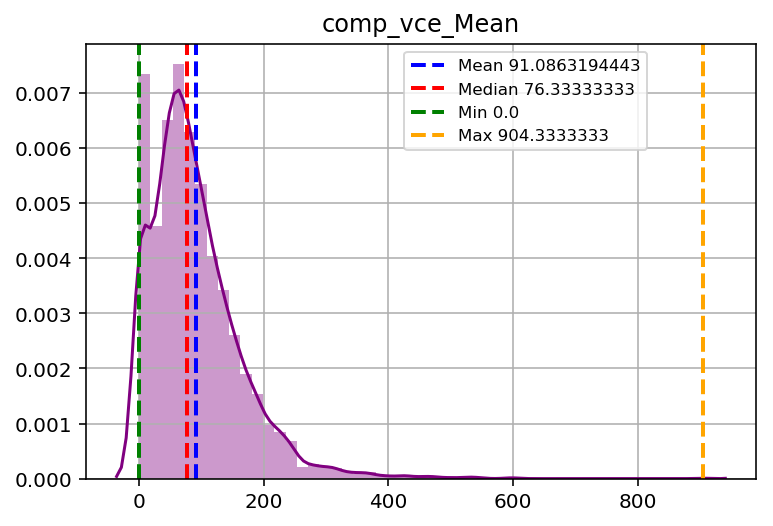

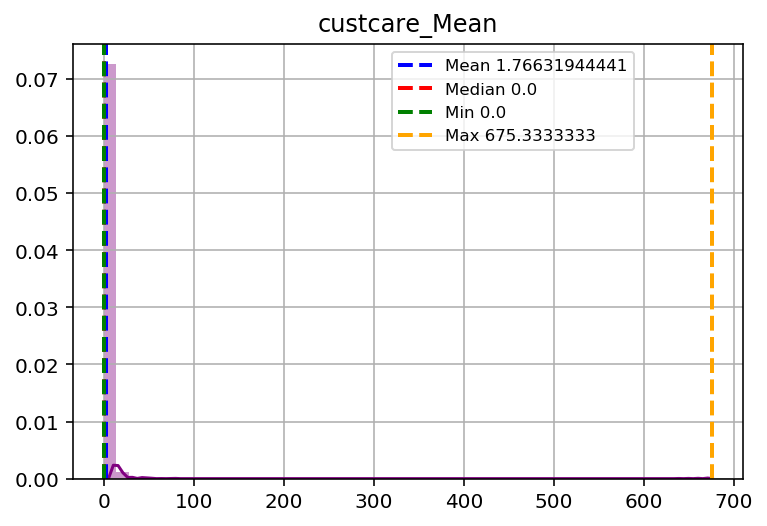

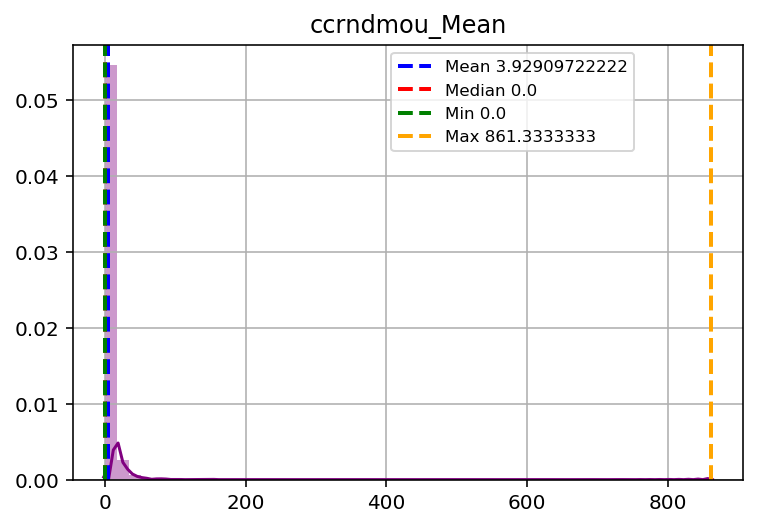

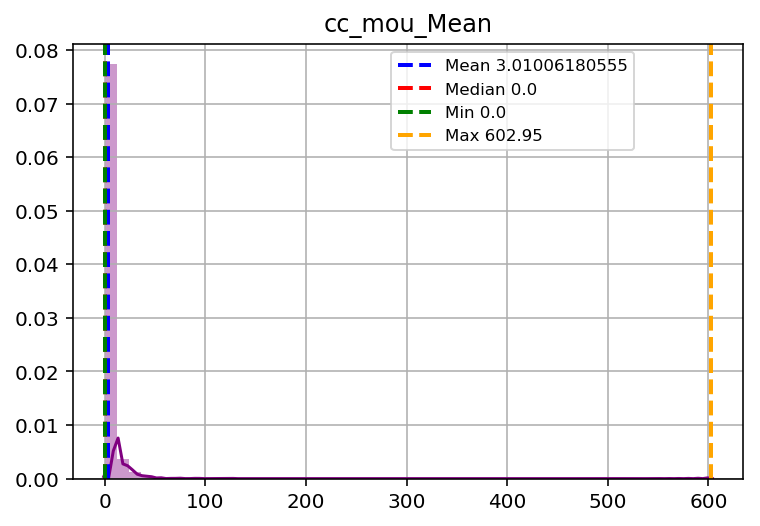

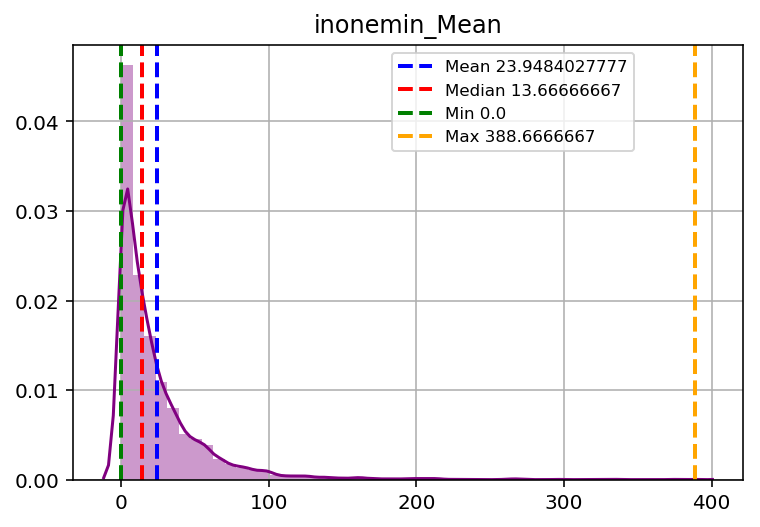

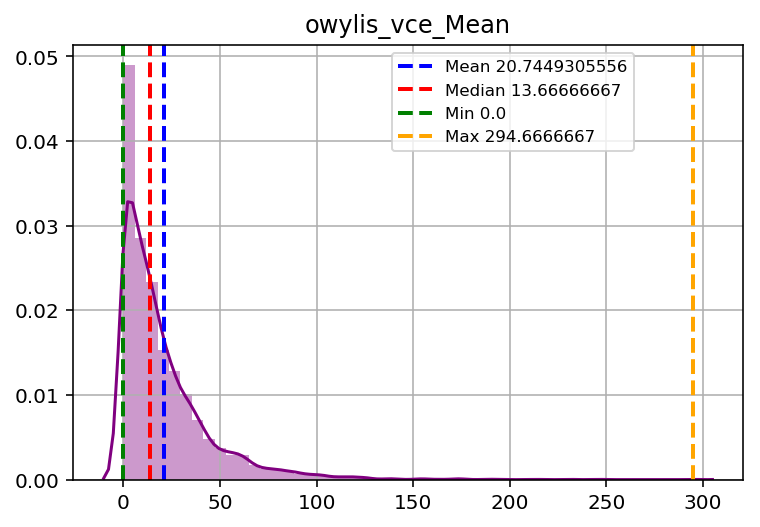

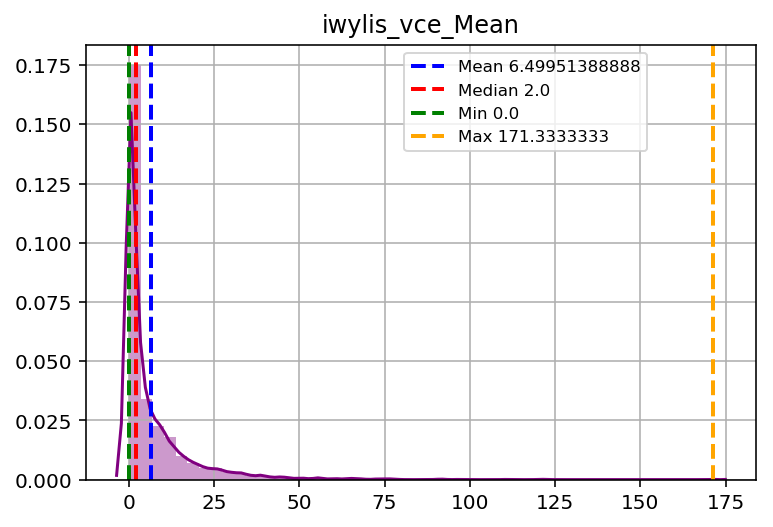

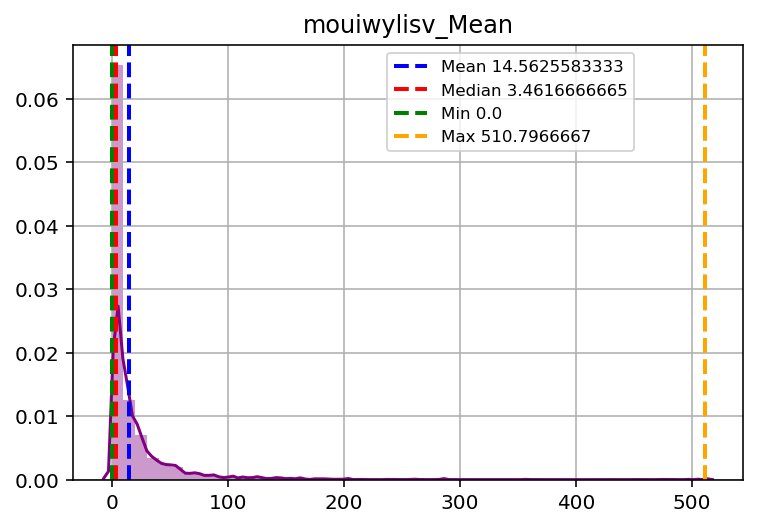

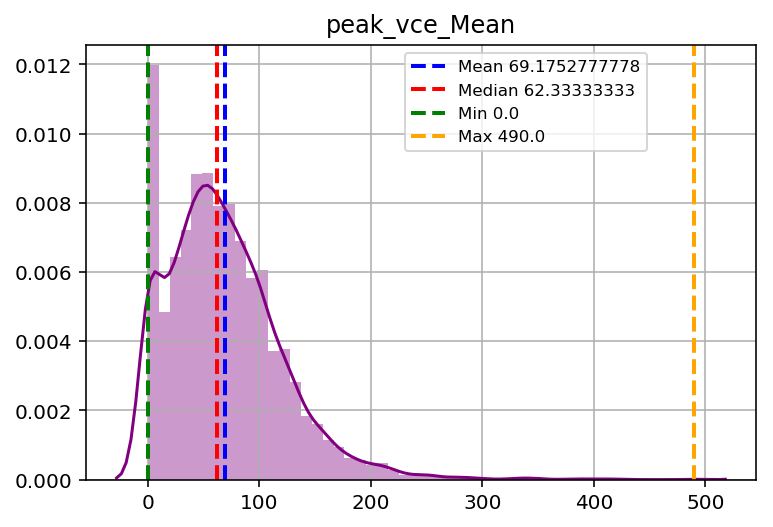

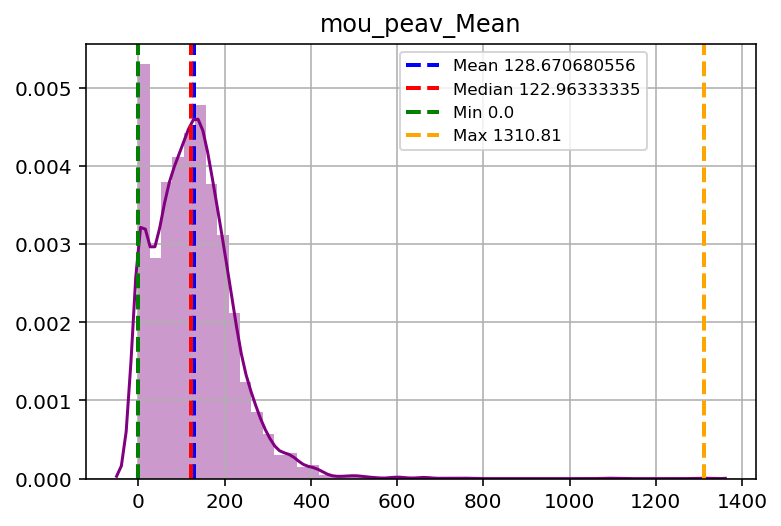

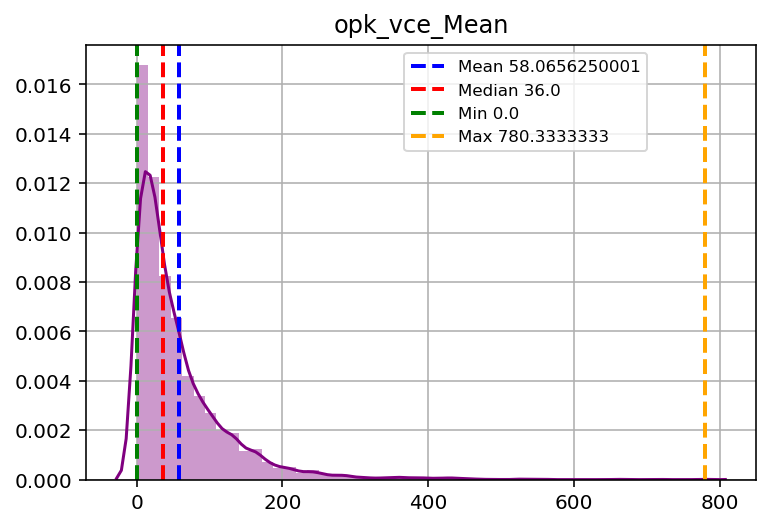

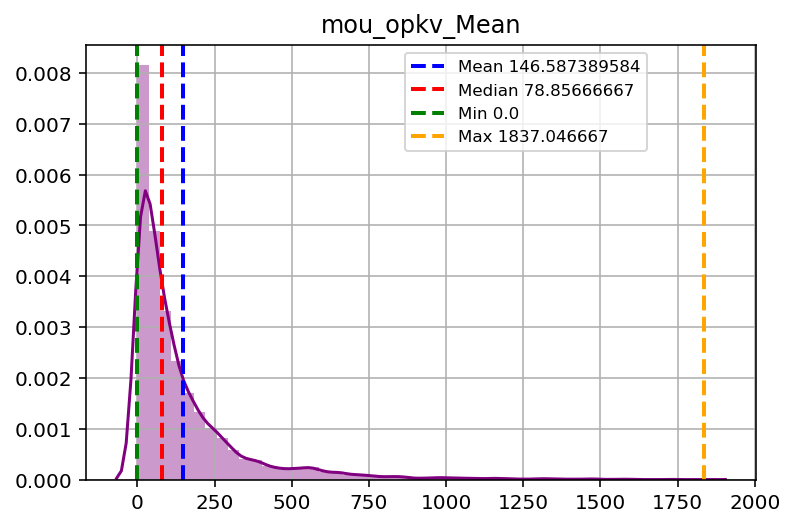

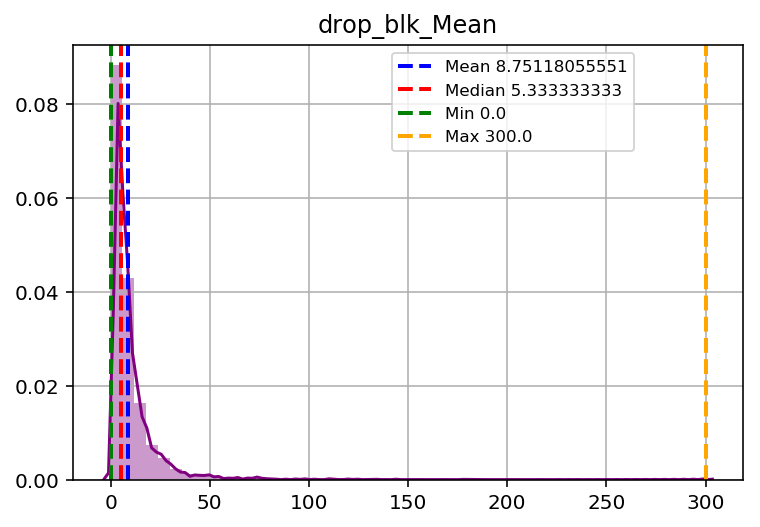

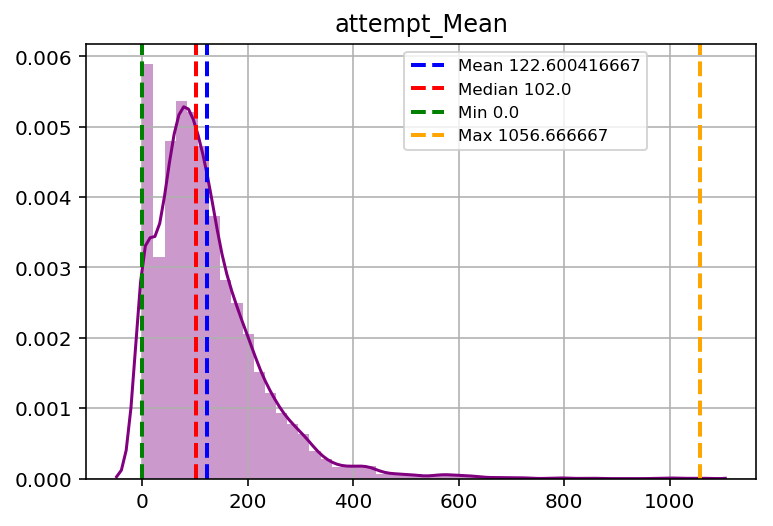

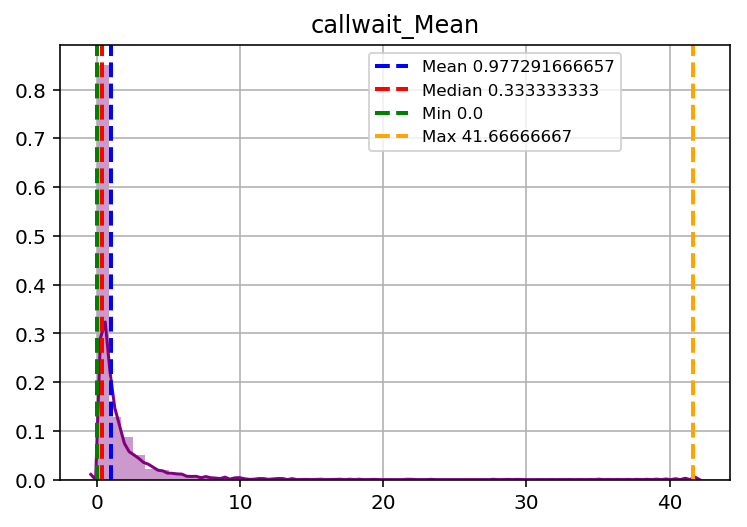

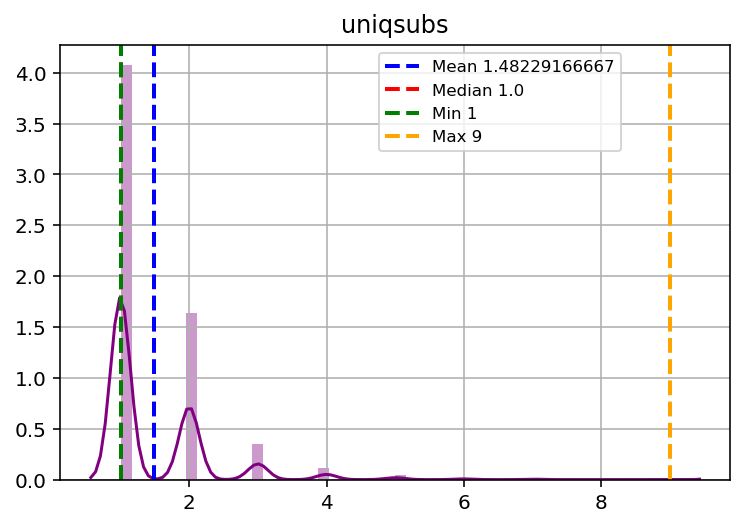

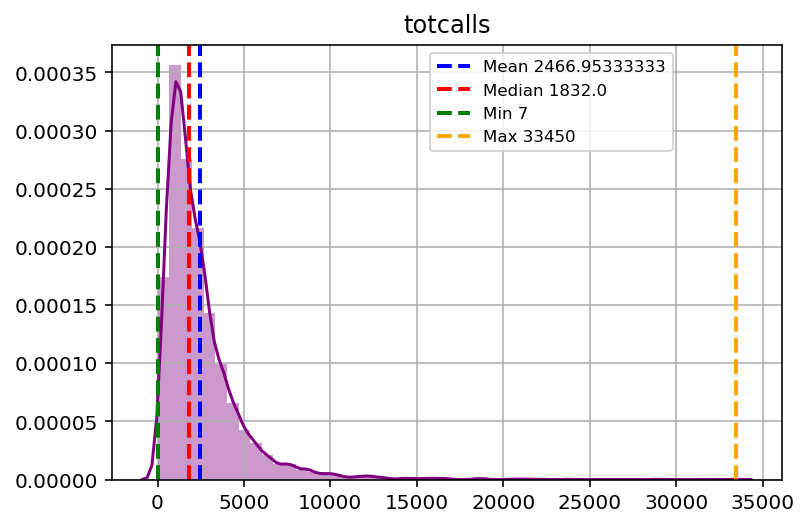

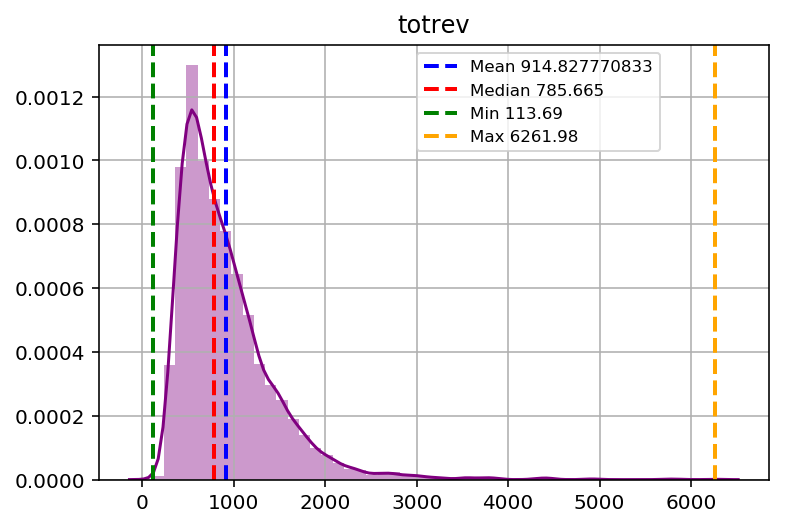

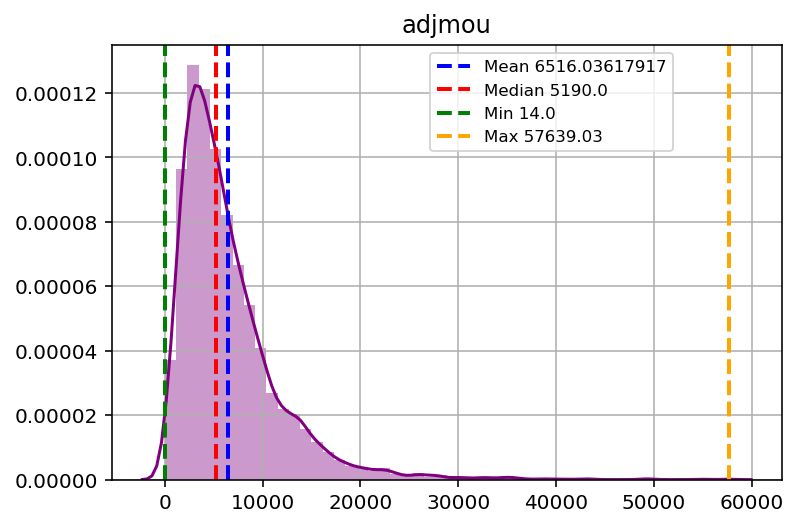

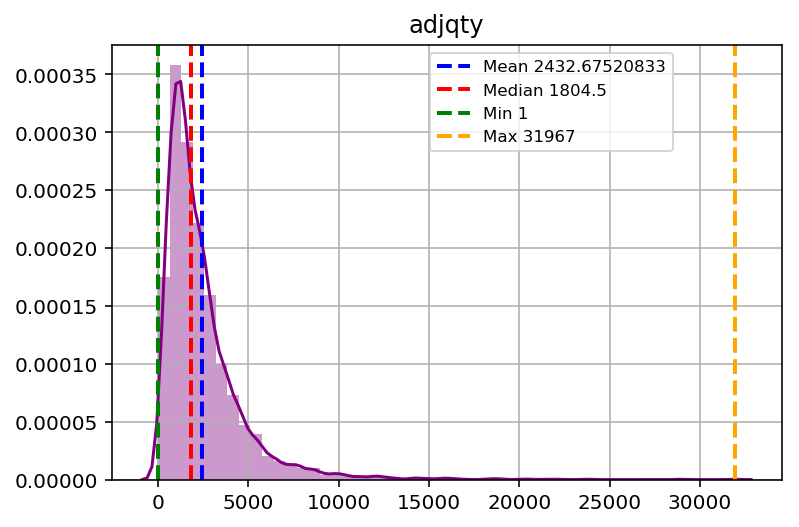

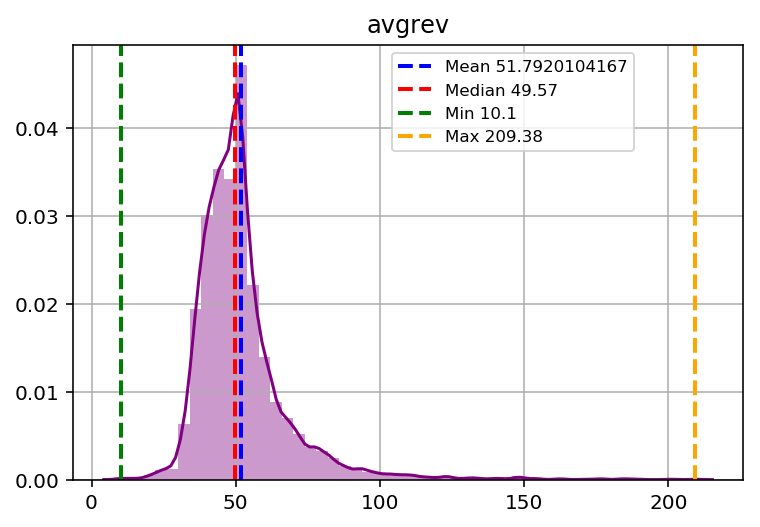

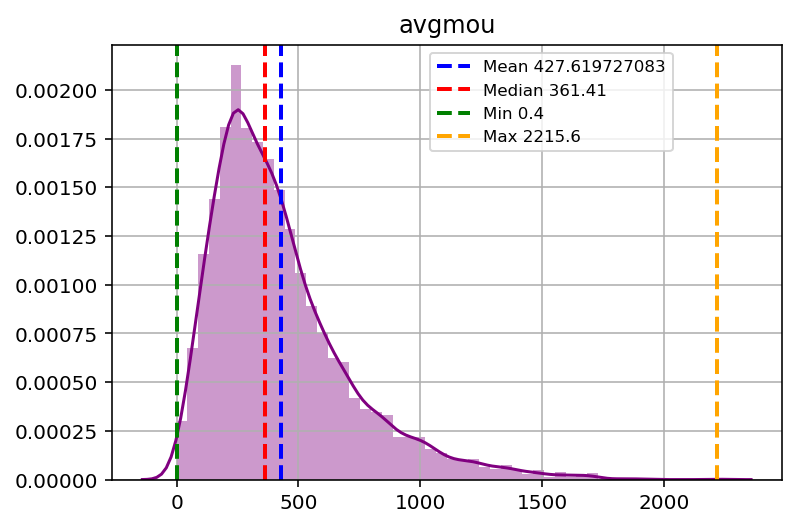

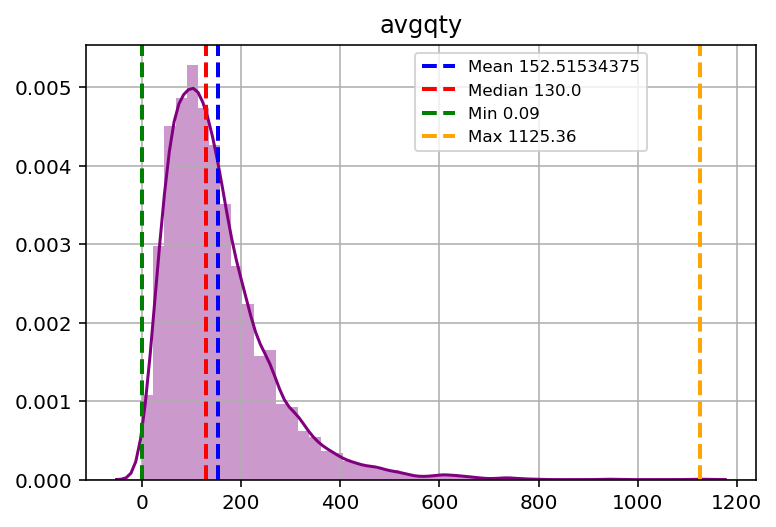

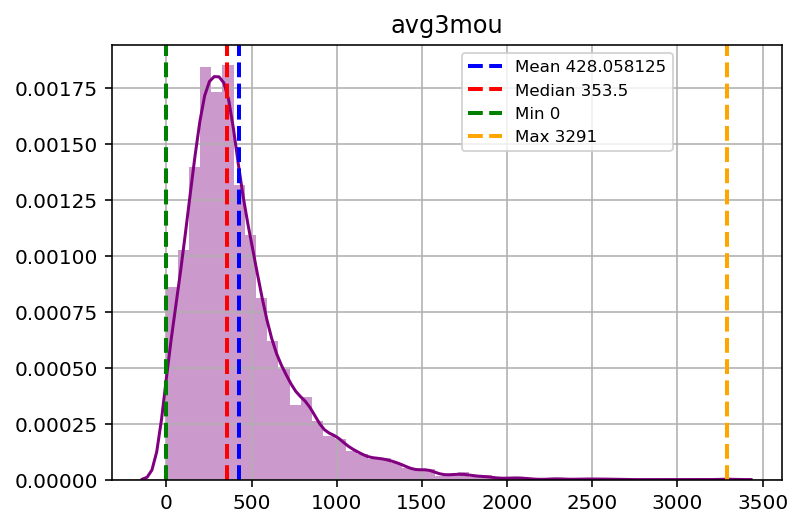

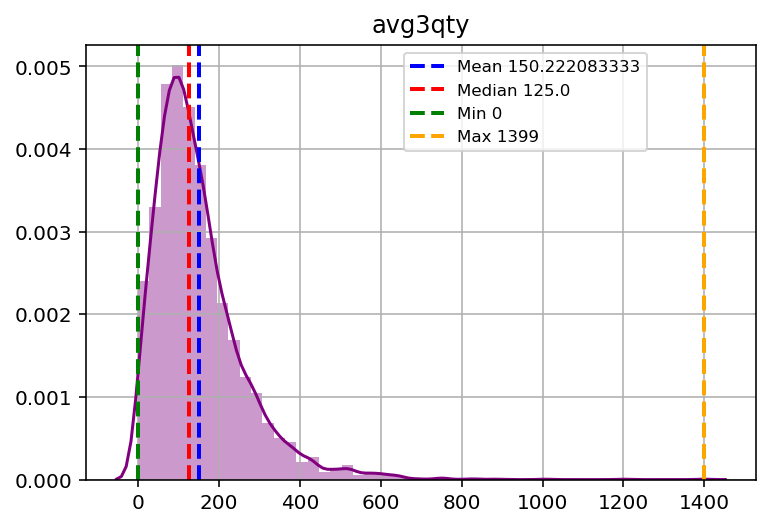

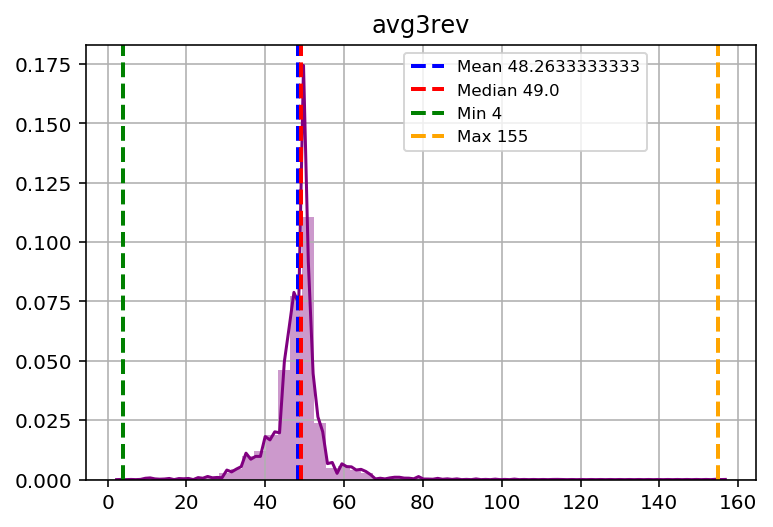

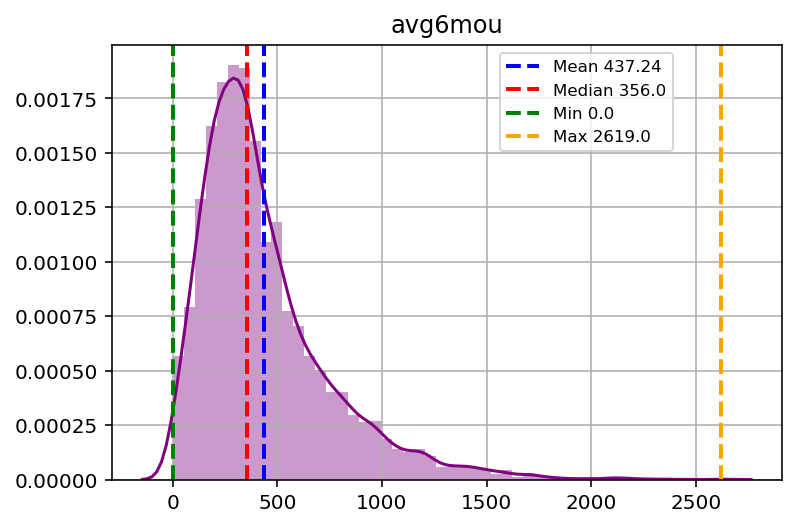

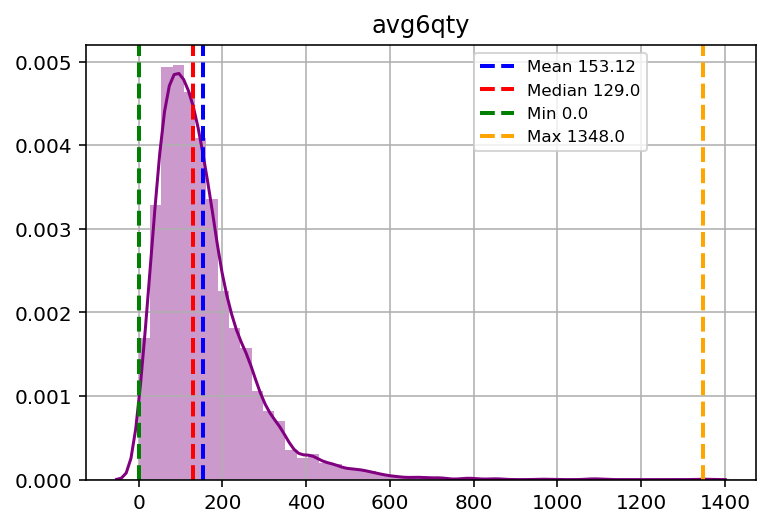

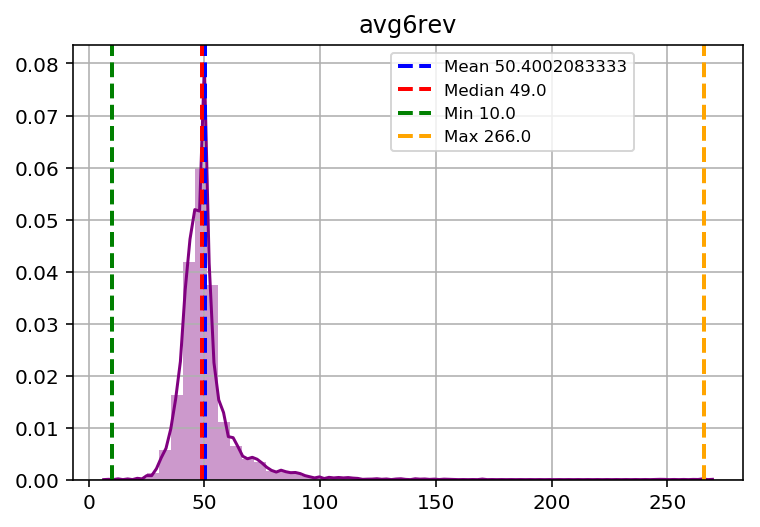

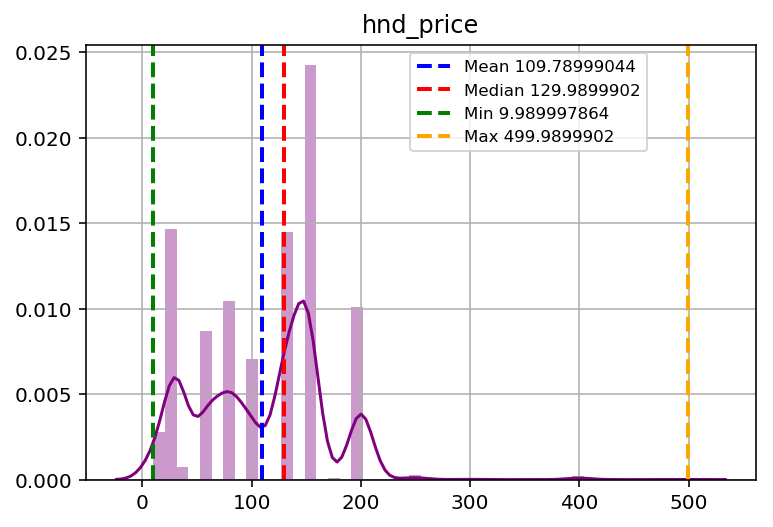

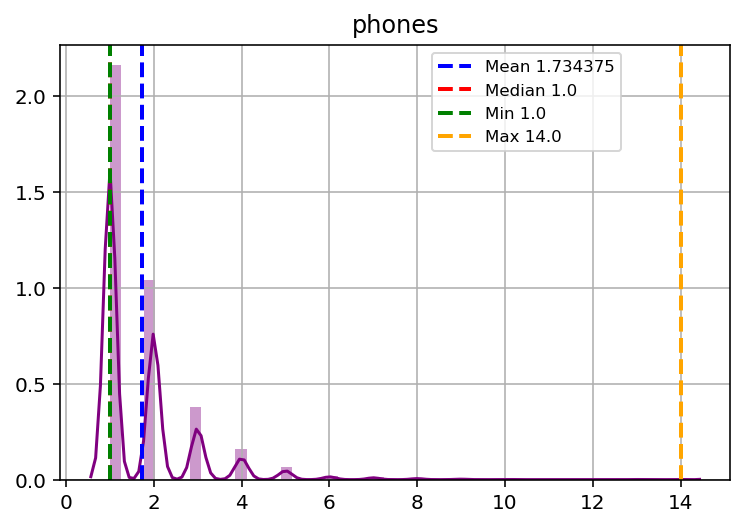

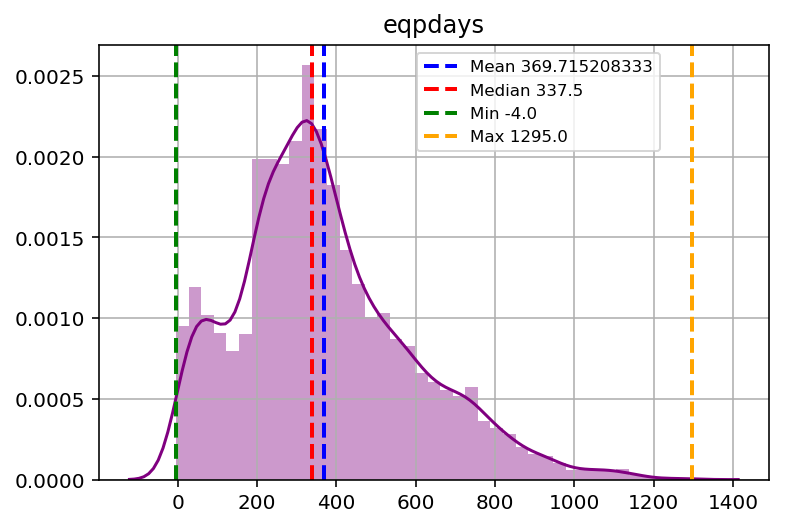

In [45]:
for feature in df.drop(string_features,axis=1).columns:
    plt.figure()
    plt.title(feature)
    ax = sns.distplot(df[[feature]],color='purple')
    ax.grid(b=True, which='major')
    plt.axvline(df[feature].mean(), color='blue', linestyle='dashed', linewidth=2,label='Mean '+str(df[feature].mean()))
    plt.axvline(df[feature].median(), color='red', linestyle='dashed', linewidth=2,label='Median '+str(df[feature].median()))
    plt.axvline(df[feature].min(), color='green', linestyle='dashed', linewidth=2,label='Min '+str(df[feature].min()))
    plt.axvline(df[feature].max(), color='orange', linestyle='dashed', linewidth=2,label='Max '+str(df[feature].max()))
    plt.legend(loc='upper right', bbox_to_anchor=(0.85, 1),fontsize='small')
    plt.show()

# Pair plotting with target variable (Churn)

We will see scatter plot code if it can give us some insights for predicting churn. The inspiration came from lesson 3.14 which examples cancer prediction.

Doing it on a smaller data set (called dfs) as it does not work on large number of rows.

In [46]:
dfs = df[0:100]

In [47]:
"""
Copied from 3.14
"""
# set the seaborn style to have a white background
sns.set(style="ticks", color_codes=True)

# This function does a pairplot across your variables with the color
# set as the outcome "malignant" class variable
def bcw_pairplotter(dfs, variables, sample_frac=0.6):
    # sample_frac lets you specify an amount of the data to sample for the plot.
    # this speeds up the function which can take awhile with the full data.
    
    # get the number of rows/data points:
    rows = dfs.shape[0]
    
    # get downsample indicies for the data, if specified
    if sample_frac < 1.0:
        sample_inds = np.random.choice(range(0,rows), 
                                       size=int(round(rows*sample_frac)), 
                                       replace=False).astype(int)
    
    # make the pairplot for the variables:
    pairs = sns.pairplot(dfs.iloc[sample_inds, :], 
                         vars=variables, 
                         hue="churn", 
                         palette=sns.xkcd_palette(['windows blue', 'amber']))

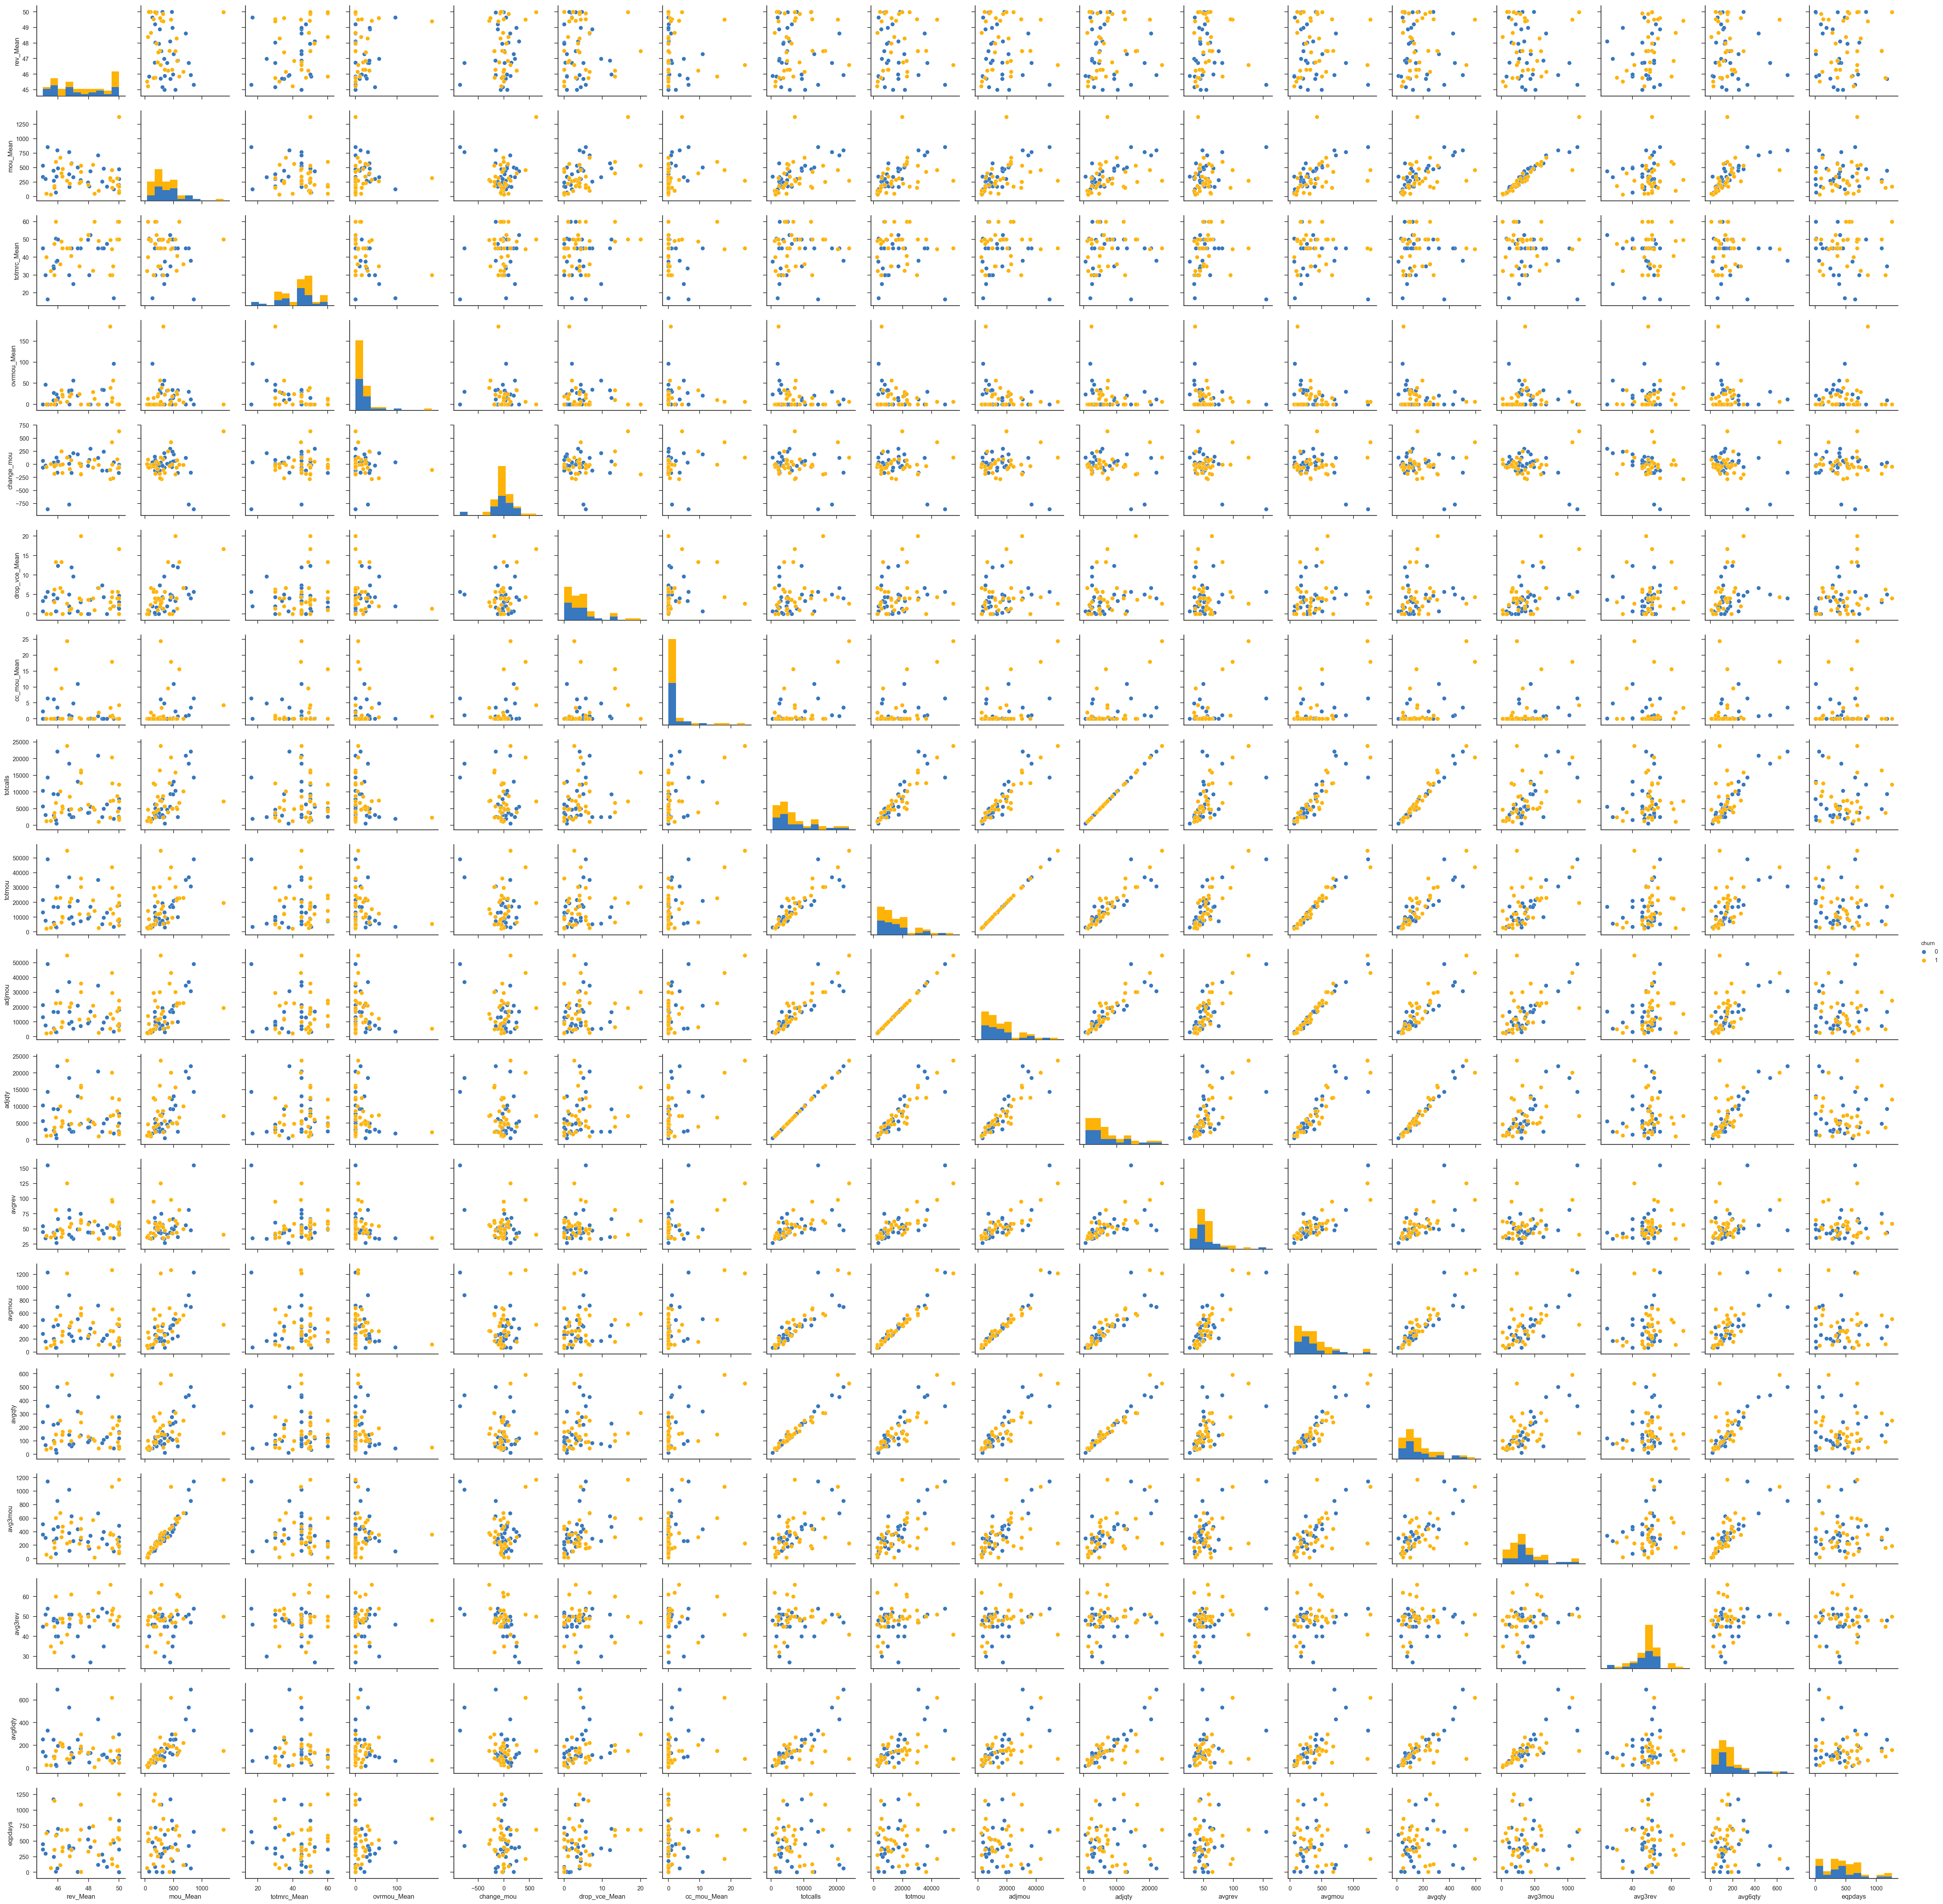

In [48]:
# get out the column variable names to put into the pairplotter function
dfs = dfs[['rev_Mean','mou_Mean','totmrc_Mean','ovrmou_Mean','change_mou','drop_vce_Mean','cc_mou_Mean','totcalls','totmou','adjmou','adjqty','avgrev','avgmou','avgqty','avg3mou','avg3rev','avg6qty','eqpdays','churn']]
colvars = [x for x in dfs if x not in ['churn']]
bcw_pairplotter(dfs, colvars)

# Modeling start

As we are done with data cleaning till this point and have seen some distribution of data so we will model/classify customers w.r.t target variable.

# Define X and y 

This cell will define X (our inputs) and y (our output) so that we can set it here and use it for different modeling techniques.

In [199]:
# All original numerical features/columns
dfs = df#[0:1000]
# dfs.reset_index(inplace=True) #Making dfs as input so resetting the index.
X = dfs[[col for col in dfs if col not in string_features_and_output]] # Means all original numeric variables
y = dfs['churn']
# X.drop(['level_0','index'],axis=1,inplace=True)

# Define dummies

Define dummy variables from all non numeric fields and we can use concatenation accordingly for including them into our input.

In [205]:
# Make dummies out of non-numeric categorical variables. Python commands only
for col in string_features_wo_cust_id:
    print col+'_dummies = pd.get_dummies(dfs.'+col+')'

dualband_dummies = pd.get_dummies(dfs.dualband)
creditcd_dummies = pd.get_dummies(dfs.creditcd)
kid16_17_dummies = pd.get_dummies(dfs.kid16_17)
kid11_15_dummies = pd.get_dummies(dfs.kid11_15)
kid6_10_dummies = pd.get_dummies(dfs.kid6_10)
kid3_5_dummies = pd.get_dummies(dfs.kid3_5)
kid0_2_dummies = pd.get_dummies(dfs.kid0_2)
ethnic_dummies = pd.get_dummies(dfs.ethnic)
marital_dummies = pd.get_dummies(dfs.marital)
prizm_social_one_dummies = pd.get_dummies(dfs.prizm_social_one)
crclscod_dummies = pd.get_dummies(dfs.crclscod)
hnd_webcap_dummies = pd.get_dummies(dfs.hnd_webcap)
new_cell_dummies = pd.get_dummies(dfs.new_cell)
area_dummies = pd.get_dummies(dfs.area)
refurb_new_dummies = pd.get_dummies(dfs.refurb_new)
asl_flag_dummies = pd.get_dummies(dfs.asl_flag)


In [206]:
# Execute commands from above step to generate dummies
dualband_dummies = pd.get_dummies(dfs.dualband)
creditcd_dummies = pd.get_dummies(dfs.creditcd)
kid16_17_dummies = pd.get_dummies(dfs.kid16_17)
kid11_15_dummies = pd.get_dummies(dfs.kid11_15)
kid6_10_dummies = pd.get_dummies(dfs.kid6_10)
kid3_5_dummies = pd.get_dummies(dfs.kid3_5)
kid0_2_dummies = pd.get_dummies(dfs.kid0_2)
ethnic_dummies = pd.get_dummies(dfs.ethnic)
marital_dummies = pd.get_dummies(dfs.marital)
prizm_social_one_dummies = pd.get_dummies(dfs.prizm_social_one)
crclscod_dummies = pd.get_dummies(dfs.crclscod)
hnd_webcap_dummies = pd.get_dummies(dfs.hnd_webcap)
new_cell_dummies = pd.get_dummies(dfs.new_cell)
area_dummies = pd.get_dummies(dfs.area)
refurb_new_dummies = pd.get_dummies(dfs.refurb_new)
asl_flag_dummies = pd.get_dummies(dfs.asl_flag)

In [207]:
# Concatenate dummies with X to make a larger X
concat_dummies = [X,dualband_dummies,creditcd_dummies,kid16_17_dummies,kid11_15_dummies,kid6_10_dummies,
kid3_5_dummies,kid0_2_dummies,ethnic_dummies,marital_dummies,prizm_social_one_dummies,crclscod_dummies,
hnd_webcap_dummies,new_cell_dummies,area_dummies,refurb_new_dummies,asl_flag_dummies]
X = pd.concat(concat_dummies,axis=1)

In [208]:
print X.shape,y.shape

(4800, 162) (4800L,)


# Baseline accuracy

In [71]:
churn_1 = np.mean(df.churn)
churn_1 = 0.48
churn_0 = 0.52
base_acc = (churn_1*churn_1 + churn_0*churn_0)
base_acc

0.5008

# 1 Random Forest modeling

Doing initial modeling without any feature engineering and throwing evryhting to random forest.

We tried with smaller data set and went till 97000 records from data frame.

In [209]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)
rfc = RandomForestClassifier(n_estimators=111, random_state=12)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print "Accuracy Score:", acc.round(3)

s = cross_val_score(rfc, X, y, cv=3, n_jobs=-1)
print "Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3))

Accuracy Score: 0.604
Cross Validation Score:	0.564 ± 0.009


# Feature importance (RFC)

To see that how much a feature contributed by random forest modeling we will use some builtin method of random forest classifier and will merge it with columns of our input.

In [210]:
# Feature importance ALL columns thrown without any pre work
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']
feature_importances.sort_values('importance', ascending=False)

feature  importance
55                         eqpdays    0.031334
8                       change_mou    0.027357
34                          months    0.025080
39                          totrev    0.022972
1                         mou_Mean    0.022820
40                          adjrev    0.021690
43                          avgrev    0.021411
49                         avg6mou    0.020348
0                         rev_Mean    0.019680
44                          avgmou    0.019634
46                         avg3mou    0.019565
45                          avgqty    0.019448
9                       change_rev    0.019012
37                        totcalls    0.018957
42                          adjqty    0.018829
41                          adjmou    0.018511
50                         avg6qty    0.018355
47                         avg3qty    0.018243
29                   mou_opkv_Mean    0.017671
38                          totmou    0.017332
20                   mou_cvce_Mean    0.017140
12                   unan_vce_Mean    0.016838
21                   mou_rvce_Mean    0.016659
23                 mouowylisv_Mean    0.016389
26                   peak_vce_Mean    0.016070
28                    opk_vce_Mean    0.015919
27                   mou_peav_Mean    0.015624
51                         avg6rev    0.015444
14                   recv_vce_Mean    0.015377
2                      totmrc_Mean    0.015361
31                    attempt_Mean    0.015201
19                   inonemin_Mean    0.015199
25                 mouiwylisv_Mean    0.015184
15                   comp_vce_Mean    0.015098
13                   plcd_vce_Mean    0.015082
22                 owylis_vce_Mean    0.014974
30                   drop_blk_Mean    0.014892
32                   complete_Mean    0.014797
5                      ovrrev_Mean    0.014689
48                         avg3rev    0.014197
10                   drop_vce_Mean    0.013752
6                      vceovr_Mean    0.013547
4                      ovrmou_Mean    0.013500
11                   blck_vce_Mean    0.012780
24                 iwylis_vce_Mean    0.012362
52                       hnd_price    0.009882
18                     cc_mou_Mean    0.009386
3                          da_Mean    0.009032
17                   ccrndmou_Mean    0.008687
16                   custcare_Mean    0.008136
..                             ...         ...
147               LOS ANGELES AREA    0.001213
141       CENTRAL/SOUTH TEXAS AREA    0.001209
57                               T    0.001183
69                               U    0.001143
151             NORTH FLORIDA AREA    0.001134
88                               A    0.001124
67                               U    0.001076
153                      OHIO AREA    0.001065
101                              B    0.001042
157                 TENNESSEE AREA    0.001025
152  NORTHWEST/ROCKY MOUNTAIN AREA    0.000985
132                             ZA    0.000941
78                               J    0.000911
155             SOUTH FLORIDA AREA    0.000899
74                               F    0.000721
83                               R    0.000446
104                              C    0.000397
71                               B    0.000387
73                               D    0.000288
124                              U    0.000199
130                             Z4    0.000195
114                             E4    0.000189
118                             GA    0.000166
99                              A2    0.000165
105                             C2    0.000162
109                              D    0.000135
128                              Z    0.000124
72                               C    0.000118
110                             D4    0.000112
82                               P    0.000109
129                             Z1    0.000075
79                               M    0.000054
116                             EM    0.000052
108                             

# 2 Logistic Regression modeling

To see if logistic regressions gives a different/better result.

The score was .589 when all numeric and dummy variables were thrown to model for all data frame.

In [211]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)
logreg.fit(X_train,y_train)


logreg_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, logreg_pred)

print "Acuracy Score:", acc.round(3), logreg.score(X_test,y_test)

Acuracy Score: 0.562 0.5625


# Coefficient weights (LR)

Checking weights of coefficients of linear equation. As it is an array element within an array so we are taking forst element of array and making a data frame out of it. Features of data frame are:

* Column names from X
* Coefficient of X

In [212]:
# Coeeficents weights, they are NOT feature importance
# len(logreg.coef_[0]) Using index 0 becuase the scores are inside an array or one array.
feature_importances = pd.DataFrame(logreg.coef_[0],
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'coefficient']
feature_importances.sort_values('coefficient', ascending=False)

feature  coefficient
154              PHILADELPHIA AREA     0.356823
130                             Z4     0.344551
83                               R     0.342231
155             SOUTH FLORIDA AREA     0.306751
73                               D     0.238527
118                             GA     0.227111
152  NORTHWEST/ROCKY MOUNTAIN AREA     0.203991
146                   HOUSTON AREA     0.187565
15                   comp_vce_Mean     0.181614
132                             ZA     0.175685
116                             EM     0.149283
31                    attempt_Mean     0.134731
133                             ZY     0.132675
119                              I     0.126624
140          CALIFORNIA NORTH AREA     0.106976
35                        uniqsubs     0.102918
0                         rev_Mean     0.087577
125                             U1     0.086654
131                             Z5     0.086264
109                              D     0.085709
110                             D4     0.082005
84                               S     0.081478
117                              G     0.069629
11                   blck_vce_Mean     0.068525
113                              E     0.068369
102                             B2     0.067577
105                             C2     0.064765
10                   drop_vce_Mean     0.063968
75                               G     0.059578
129                             Z1     0.052746
81                               O     0.049013
108                             CY     0.042294
94                               R     0.042278
99                              A2     0.041976
150             NEW YORK CITY AREA     0.041663
33                   callwait_Mean     0.039727
58                               Y     0.035992
76                               H     0.034449
12                   unan_vce_Mean     0.033704
156                 SOUTHWEST AREA     0.032840
123                              M     0.031490
72                               C     0.028580
78                               J     0.027607
7                        roam_Mean     0.022056
77                               I     0.021554
121                             JF     0.020008
36                        actvsubs     0.018146
18                     cc_mou_Mean     0.017792
53                          phones     0.017695
159                              R     0.017176
..                             ...          ...
127                              Y    -0.058628
48                         avg3rev    -0.061165
59                               N    -0.064441
137                              U    -0.068807
3                          da_Mean    -0.069206
88                               A    -0.071951
93                               C    -0.074168
126                              W    -0.076494
136                              N    -0.078625
64                               Y    -0.083284
56                               N    -0.084318
143                    DALLAS AREA    -0.085946
149               NEW ENGLAND AREA    -0.091426
95                               S    -0.091679
80                               N    -0.093213
142                   CHICAGO AREA    -0.094042
124                              U    -0.098623
134                             WC    -0.100506
141       CENTRAL/SOUTH TEXAS AREA    -0.107715
74                               F    -0.120737
138                              Y    -0.122392
86                               X    -0.125665
32                   complete_Mean    -0.140491
90                               M    -0.149256
97                               U    -0.152649
100                             AA    -0.162587
13                   plcd_vce_Mean    -0.167773
135                           WCMB    -0.169318
157                 TENNESSEE AREA    -0.178653
63                               U    -0.186540
114                             E4    -0.187058
71                               B    -0.19

# 3 K Nearest neighbor (KNN) modeling

The best parameters are extracted from a parallel jupyter notebook using Grid search. Code of grid search will follow after KNN.

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
print X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape

(4800L, 162L) (4800L,) (3840, 162) (3840L,) (960, 162) (960L,)


In [214]:
knn = KNeighborsClassifier(n_neighbors=50, metric='manhattan', weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [215]:
knn.score(X_test, y_test)

0.546875

In [216]:
# Grid search code from parallel notebook.
from sklearn.grid_search import GridSearchCV
knn_params = {
    'n_neighbors':[1,3,5,9,15,21,50,100,300,600],
    'weights':['uniform','distance'], #
    'metric':['euclidean','manhattan'] #,
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_gridsearch.fit(X_train, y_train)

knn_gridsearch.best_score_
knn_gridsearch.best_params_

D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.3min finished


{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}

In [217]:
print knn_gridsearch.best_score_
print knn_gridsearch.best_params_

0.565104166667
{'n_neighbors': 50, 'metric': 'manhattan', 'weights': 'distance'}


# 4 Naive Bayes modeling

Naiive bayes does not accept negative inputs so we will drop some features for modeling which are having negative values.

In [220]:
from sklearn import naive_bayes
# X.drop(['change_mou','change_rev','index','level_0'],axis=1,inplace=True)
X [X<0] = 0 # Beacause Naive Baye is not accepting negative numbers 
classifier1 = naive_bayes.MultinomialNB().fit(X, y)

In [221]:
print cross_val_score(classifier1, X, y, cv=5)

[ 0.546875    0.534375    0.5125      0.52708333  0.5125    ]


# Coefficients (NB)

In [222]:
df_test = pd.DataFrame(classifier1.coef_[0],X.columns)
df_test.sort_values(0,ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Ensemble modeling

Merging all models together.

Adding Naive Bays in model actually lowered the score so we will drop it from ensemble modelling. In code it is mentioned as clf3 and in voting classifiers as ('gnb', clf3). Score drop was from .56 to .51.


In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
# clf3 = naive_bayes.MultinomialNB().fit(X,y)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=3)
grid = grid.fit(X, y)

In [225]:
grid.best_score_

0.5395833333333333

# Feature Selection using K best

Applying some techniques for feature selection based on contribution score.


In [189]:
dfs = df#[0:1000]
X = dfs[[col for col in dfs if col not in string_features_and_output]] # Means all original numeric variables
y = dfs['churn']
# X.drop(['level_0','index'],axis=1,inplace=True)

In [191]:
X.drop(['level_0','index'],axis=1,inplace=True)

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
X[X<0] = 0 # Changing negative value to zero

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
X.shape,y.shape

((4800, 56), (4800L,))

In [195]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
kb_fs = SelectKBest(chi2, k=20)
X_new = kb_fs.fit_transform(X,y) # Cannot accept negative value
# print X_new[0]
kb_fs.get_support(indices=True) # It will give us indexes of original input 
# X.head()

array([ 1,  4,  8, 13, 15, 20, 21, 27, 28, 29, 31, 32, 39, 40, 46, 47, 49,
       50, 52, 55], dtype=int64)

In [196]:
name_array= []
for i,col in enumerate(X.columns):
    if i in kb_fs.get_support(indices=True):
        print i,col
        name_array.append(col)

1 mou_Mean
4 ovrmou_Mean
8 change_mou
13 plcd_vce_Mean
15 comp_vce_Mean
20 mou_cvce_Mean
21 mou_rvce_Mean
27 mou_peav_Mean
28 opk_vce_Mean
29 mou_opkv_Mean
31 attempt_Mean
32 complete_Mean
39 totrev
40 adjrev
46 avg3mou
47 avg3qty
49 avg6mou
50 avg6qty
52 hnd_price
55 eqpdays


# Conclusion

After using different models we have reached to following conclusion. Though no model is giving a perfect score but still we have insights for identifying potential churn customers. With inidividual and ensemble approach of modeling we are far above than baseline and quite confidently can state on churn factors.

There is a clear indiaction that network quality which is linked with completed calls is a significant factor for churn. Customers with more number of dropped calls are more likely to churn.

With above factor in place if there is a drop in peak usage that also an indicator customer more prone to churn.

And if same customers are using a higher priced equipment/handset then its a strong predictor that they are going to a different providor.


# What next

For a better result on this issue we can have more detailed data on complaints from customer care and network quality statistics. Merge with these features we can predict more accurately and organization can focus on factors leading to churn proactively before it happens.

We can also use the foundations of this model for other businesses like retail, service industry and logistics. 
